In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mayavi
import nibabel as nib
import os
import numpy as np
!pip install scikit-image
!pip install SimpleITK
import SimpleITK as sitk
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, Button
import torch
from torchvision import transforms
from skimage.transform import resize
from torch.utils.data import Dataset, DataLoader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 52.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.9/268.9 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 90.7 MB/s eta 0:00:00
  Using cached vtk-9.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (92.0 MB)
  Created wheel for mayavi: filename=mayavi-4.8.1-cp310-cp310-linux_x86_64.whl size=16167220 sha256=0420ec6e973cbeed25423471664c72d39634efec89fb61db6b1e48638abf2137
  Stored in directory: /root/.cache/pip/wheels/c2/6b/23/49aa8ae5063a76fbc35ce90e74f8361cddb9d3a86d5a41ec0a
Successfully bu

In [ ]:
# initializing the paths
image_path = "/content/drive/MyDrive/ML_project/ML/train/train_images/RibFrac10-image.nii"
label_path = "/content/drive/MyDrive/ML_project/ML/train/train_labels/RibFrac10-label.nii"

In [ ]:
# path to image and label folder
image_folder = '/content/drive/MyDrive/ML_project/ML/train/train_images'
label_folder = '/content/drive/MyDrive/ML_project/ML/train/train_labels'

# getting the list of files in the image  and label folders
image_files = os.listdir(image_folder)
label_files = os.listdir(label_folder)

# printing the number of files in each folder
print(f"Number of files in image folder: {len(image_files)}")
print(f"Number of files in label folder: {len(image_files)}")


Number of files in image folder: 110
Number of files in label folder: 110


In [ ]:
class Slideshow:
    def __init__(self, image_path, label_path, speed=1.0):
        # initializing the Slideshow with image and label paths
        self.image = nib.load(image_path).get_fdata() #loading image
        self.label = nib.load(label_path).get_fdata() #loading label
        self.num_slices = self.image.shape[1] #getting number of slices along the cornial axis

    def show_slice(self, slice_index):
      #displaying specific slice of the image and the label
        image_slice = self.image[:, slice_index, :] # extracting the image slice
        label_slice = self.label[:, slice_index, :] # extracting the label slice
        fig, ax = plt.subplots(1, 2, figsize=(10, 5)) #creating sublopts for two of them
        ax[0].imshow(image_slice, cmap='gray') # showing th image slice
        ax[0].set_title('Image')
        ax[0].axis('off')
        ax[1].imshow(label_slice, cmap='gray')  # showing the label slice
        ax[1].set_title('Label')
        ax[1].axis('off')
        plt.show()

    def run(self):
      # run interactive slideshow
      # intractive slider to select the slice index
        interact(self.show_slice, slice_index=IntSlider(min=0, max=self.num_slices - 1, step=1), continuous_update=False)

slideshow = Slideshow(image_path, label_path)
slideshow.run()

interactive(children=(IntSlider(value=0, description='slice_index', max=511), Output()), _dom_classes=('widget…

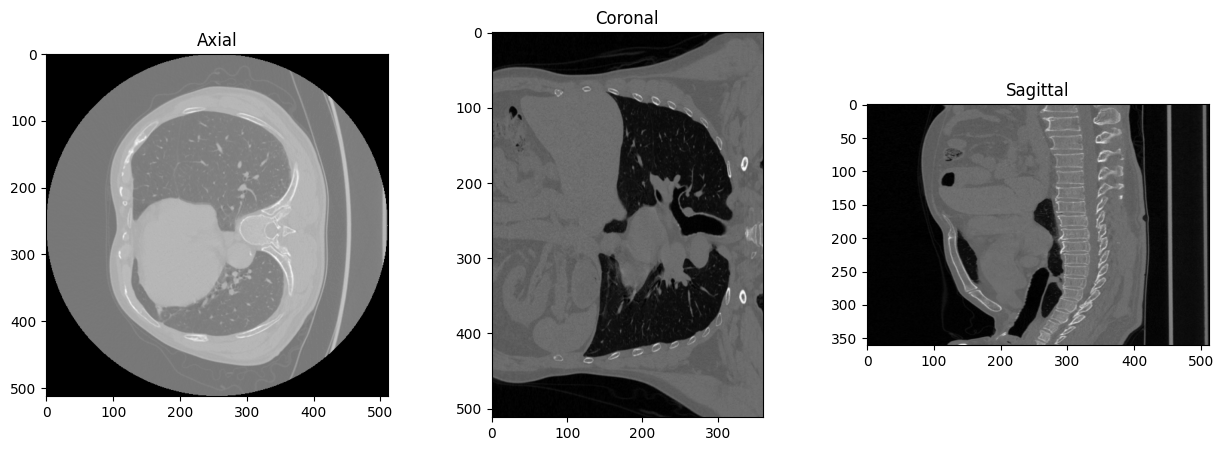

In [ ]:
# loading NIfTI image
nii_img = nib.load(image_path)
img_data = nii_img.get_fdata() #getting the image as numpy array

# displaying slices along three axes (axial, coronal, sagittal)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# axial slice
axes[0].imshow(img_data[:, :, img_data.shape[2] // 2], cmap='gray')
axes[0].set_title('Axial')

# coronal slice
axes[1].imshow(img_data[:, img_data.shape[1] // 2, :], cmap='gray')
axes[1].set_title('Coronal')

# saggital slice
axes[2].imshow(img_data[img_data.shape[0] // 2, :, :].T, cmap='gray')
axes[2].set_title('Sagittal')

plt.show()

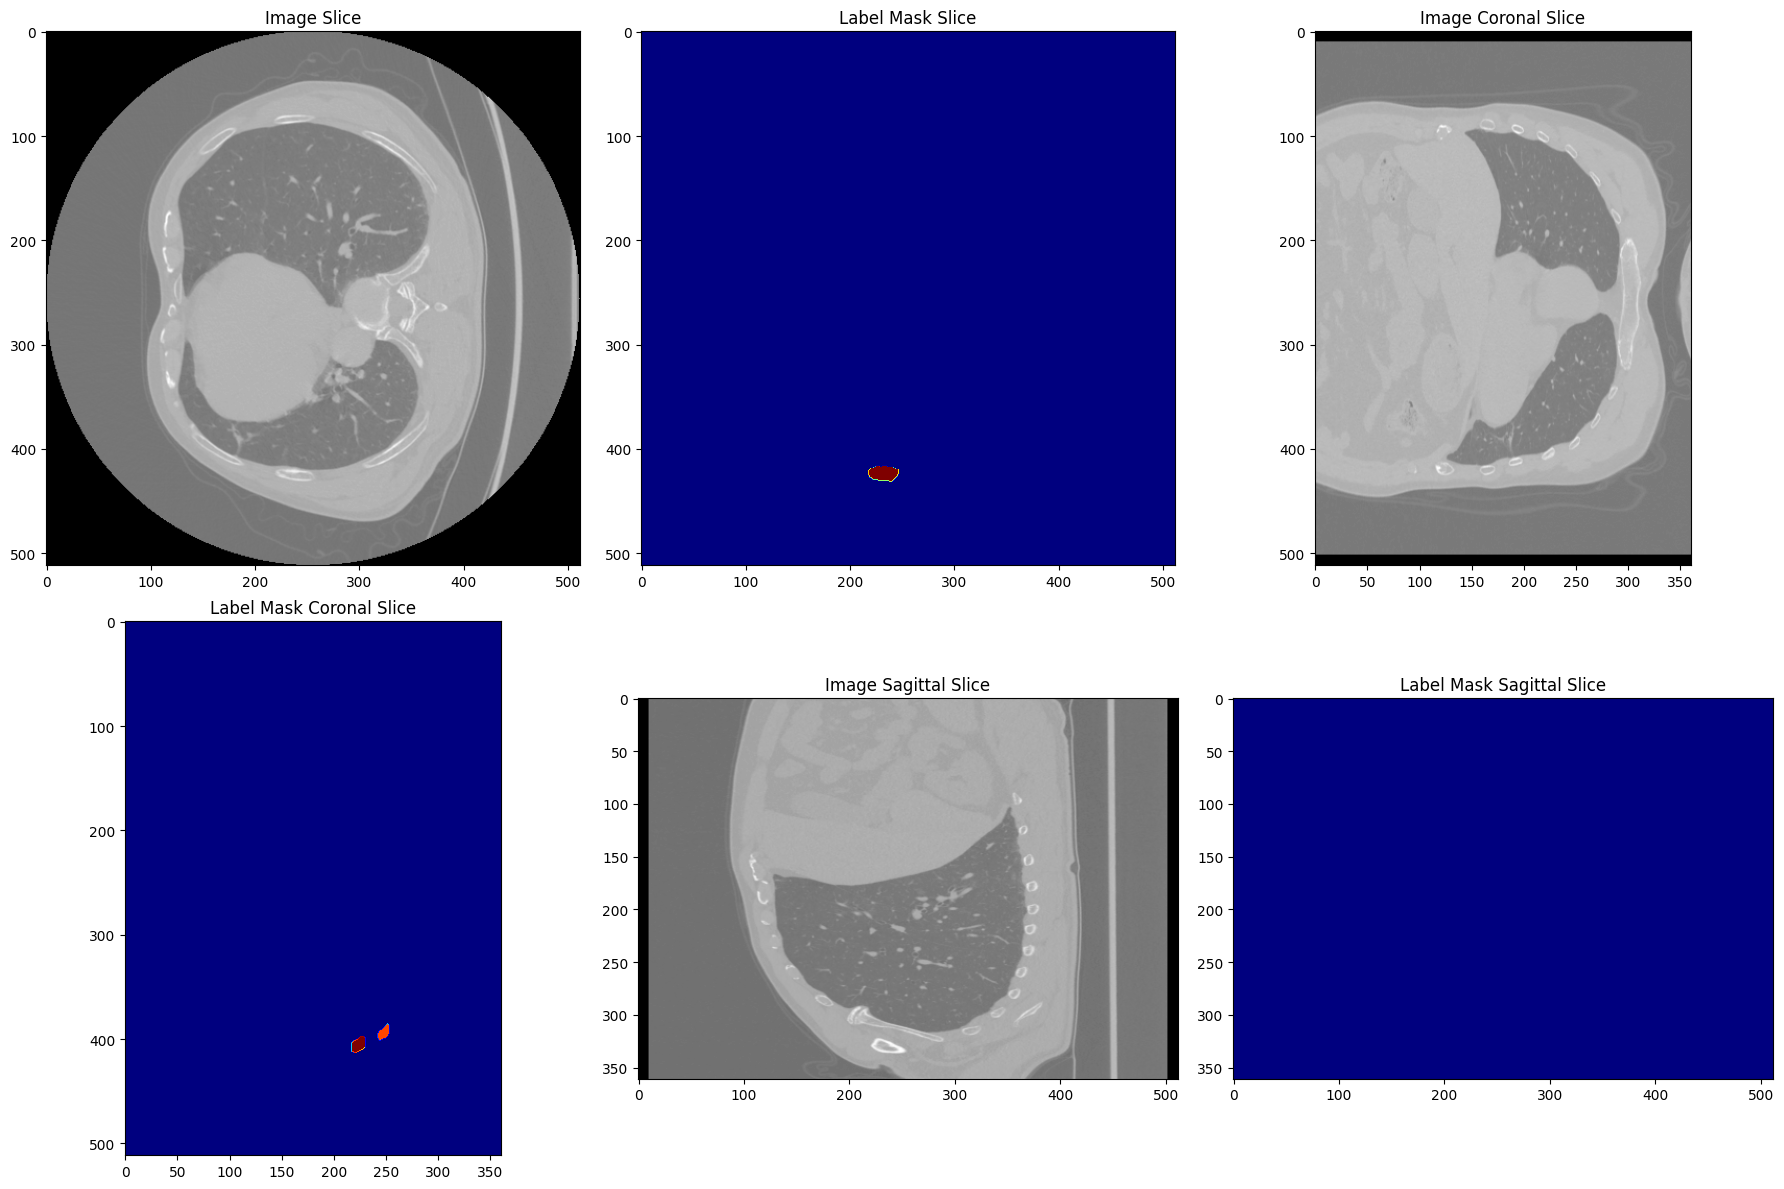

In [ ]:
# same as above but now with their respective labels

# loading label mask
label_img = nib.load(label_path)
label_data = label_img.get_fdata()

# defining specific slice number
slice_num = 186

# Display the specified slice along with its corresponding label mask
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# displaying the image slice
axes[0, 0].imshow(img_data[:, :, slice_num], cmap='gray')
axes[0, 0].set_title('Image Slice')

# displaying the label mask slice
axes[0, 1].imshow(label_data[:, :, slice_num], cmap='jet')
axes[0, 1].set_title('Label Mask Slice')

# displaying the image slice in the coronal view
axes[0, 2].imshow(img_data[:, slice_num, :], cmap='gray')
axes[0, 2].set_title('Image Coronal Slice')

# displaying the label mask slice in the coronal view
axes[1, 0].imshow(label_data[:, slice_num, :], cmap='jet')
axes[1, 0].set_title('Label Mask Coronal Slice')

# displaying the image slice in the sagittal view
axes[1, 1].imshow(img_data[slice_num, :, :].T, cmap='gray')
axes[1, 1].set_title('Image Sagittal Slice')

# displaying the label mask slice in the sagittal view
axes[1, 2].imshow(label_data[slice_num, :, :].T, cmap='jet')
axes[1, 2].set_title('Label Mask Sagittal Slice')

plt.tight_layout()
plt.show()


In [ ]:
# printing header information
print("Header information:")
print(label_img.header)

Header information:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 512 512 361   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1.       0.744141 0.744141 1.25     1.       1.       1.       1.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 194.468
qoffset_y       : 190.5
qoffse

In [ ]:
# printing label image data
label_data = label_img.get_fdata()
print("\nLabel image data:")
print(label_data)


Label image data:
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 

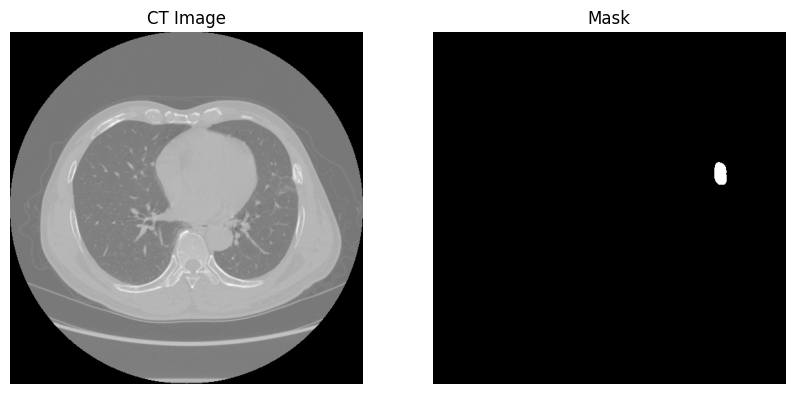

In [ ]:
# alternative way to print the images with specified slice number 200

# reading CT
img_sitk = sitk.ReadImage(image_path, sitk.sitkFloat32)
image= sitk.GetArrayFromImage(img_sitk) # converting sitk_metadata to image Array

mask_sitk = sitk.ReadImage(label_path,sitk.sitkInt32)
mask      = sitk.GetArrayFromImage(mask_sitk)# converting sitk_metadata to image Array

# plotting CT image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image[200], cmap='gray')
plt.title('CT Image')
plt.axis('off')

# plotting Mask
plt.subplot(1, 2, 2)
plt.imshow(mask[200], cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.show()

<ipython-input-10-0fbd802bb026>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


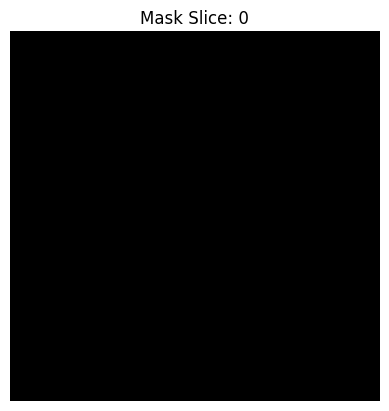

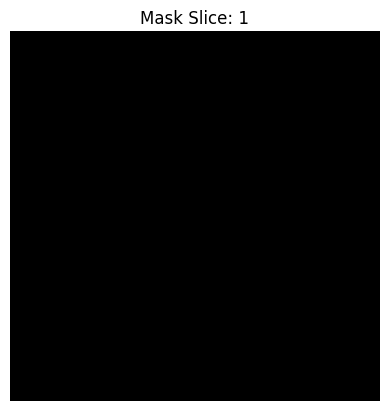

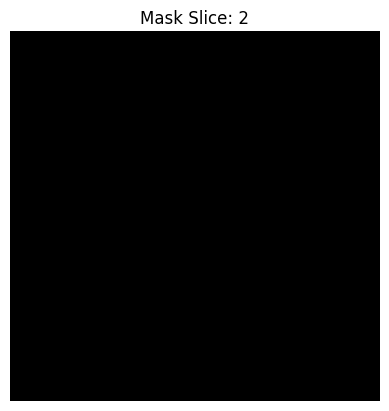

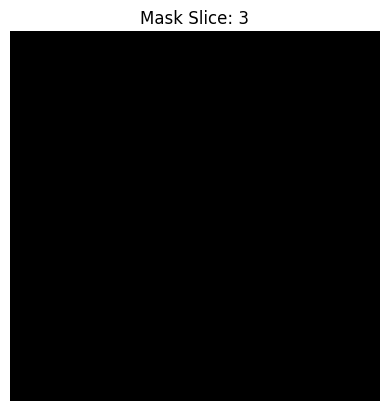

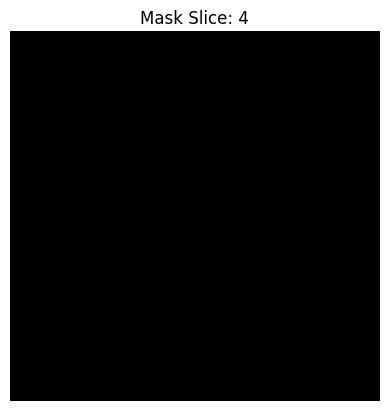

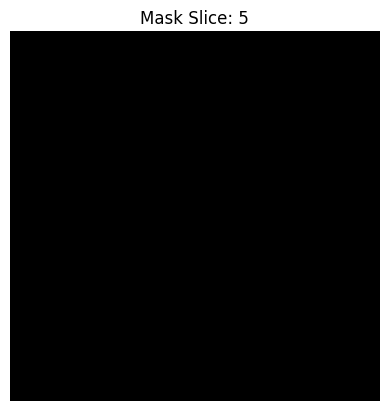

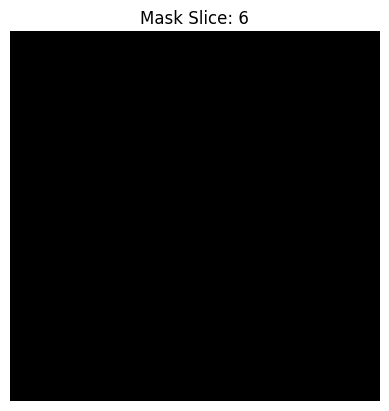

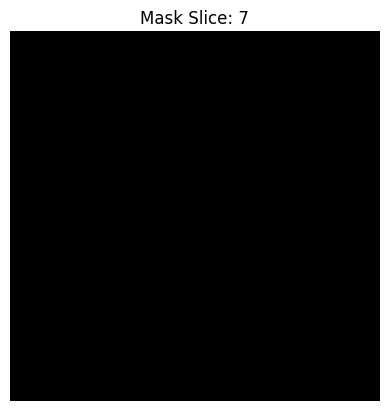

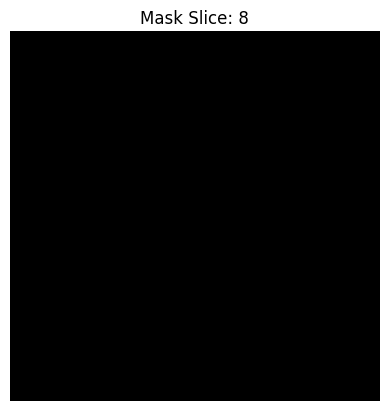

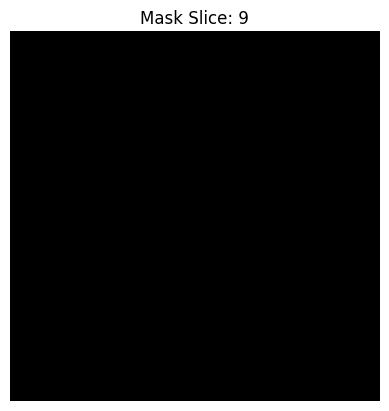

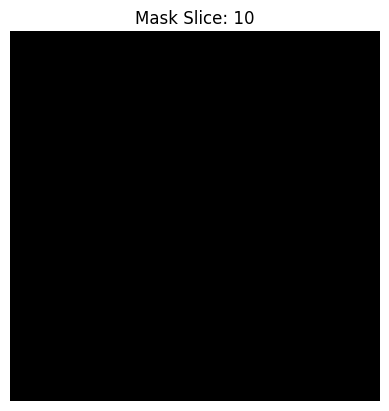

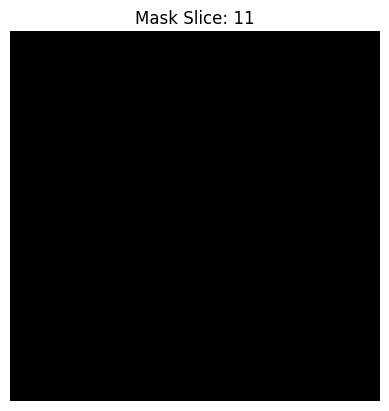

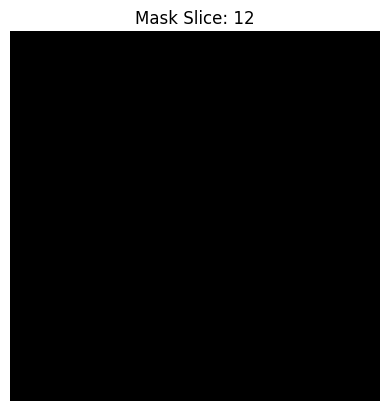

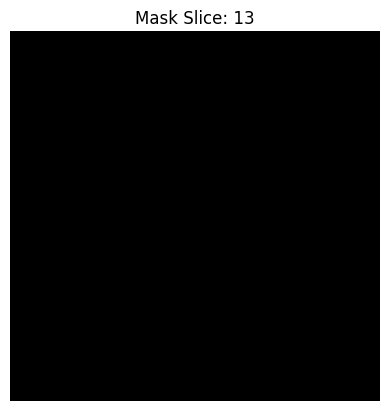

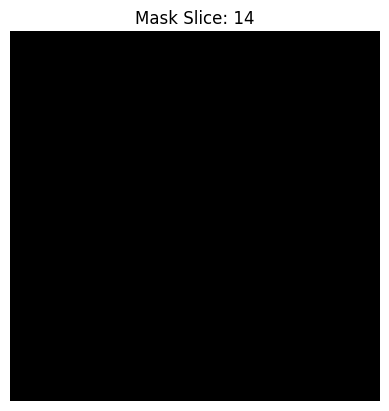

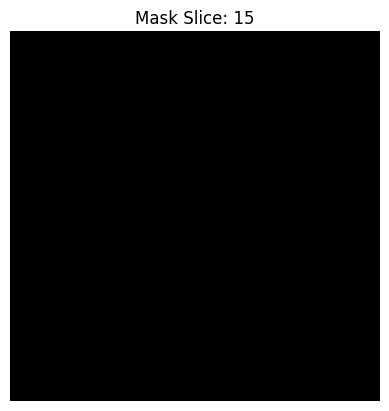

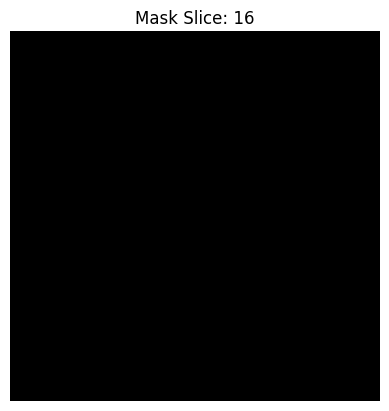

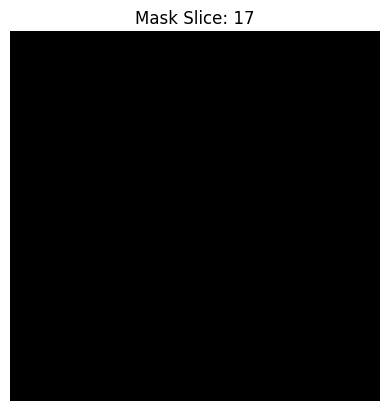

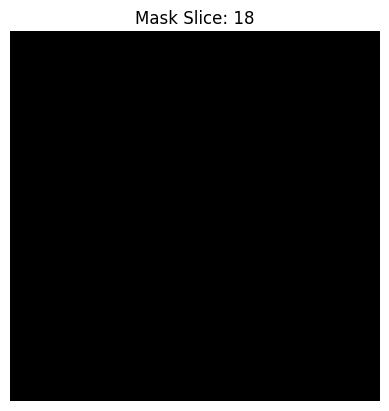

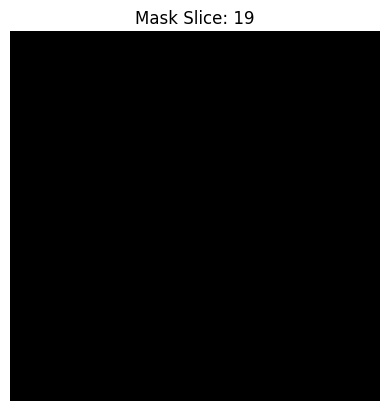

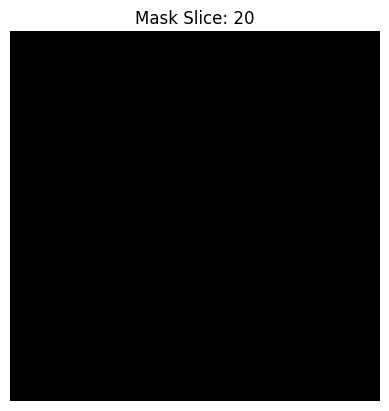

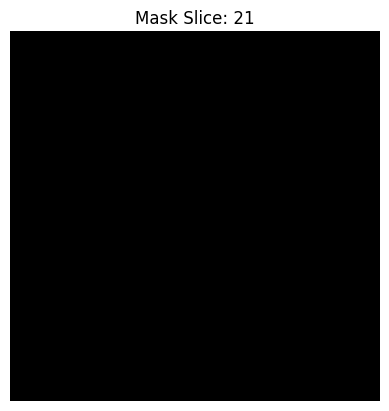

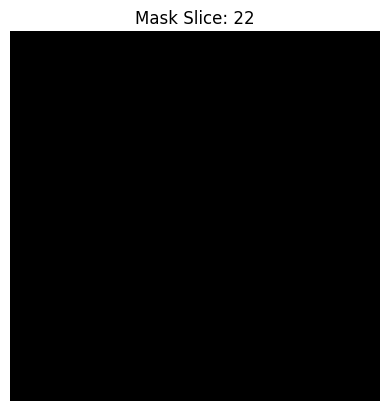

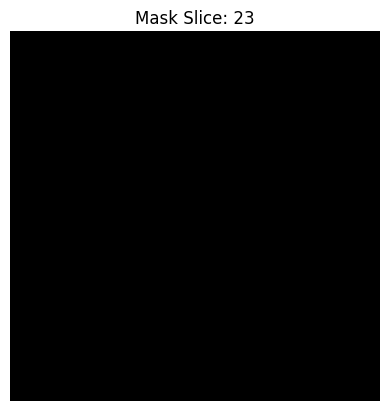

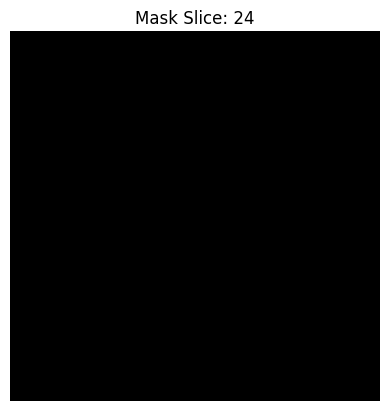

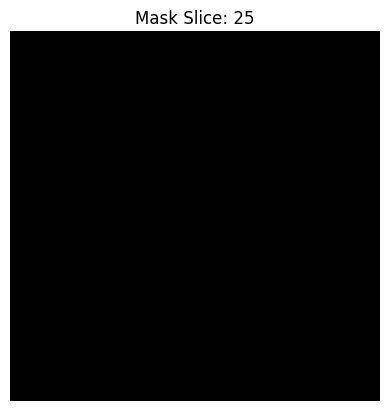

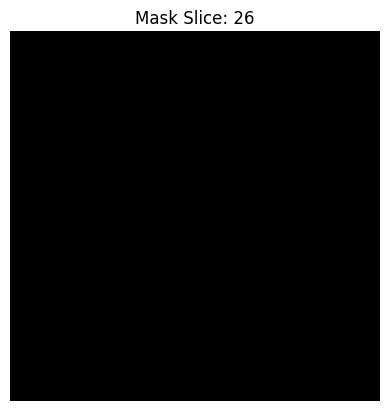

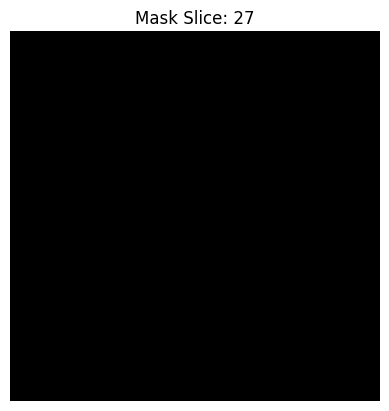

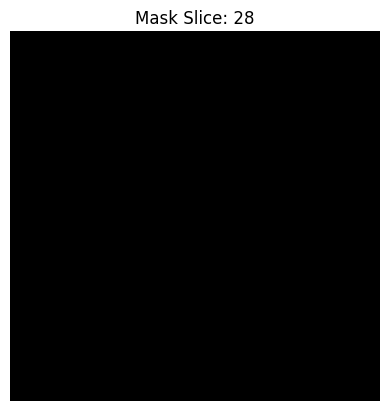

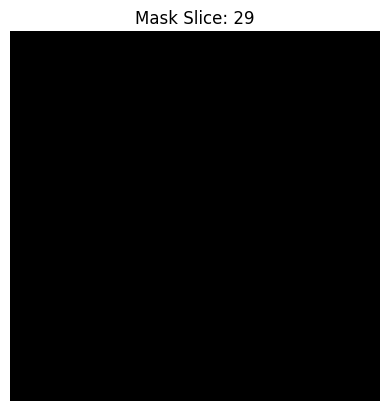

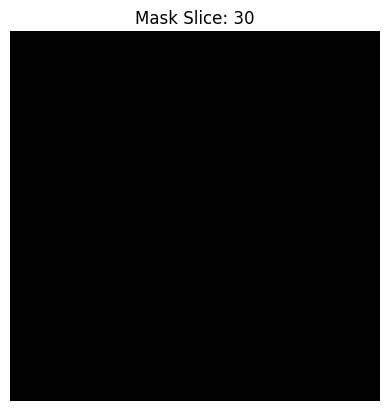

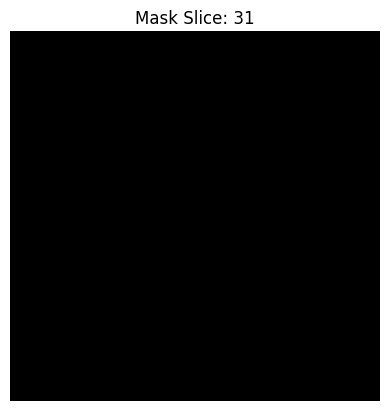

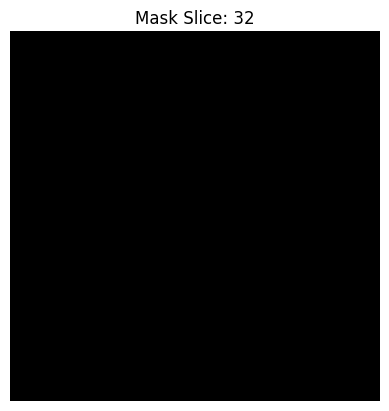

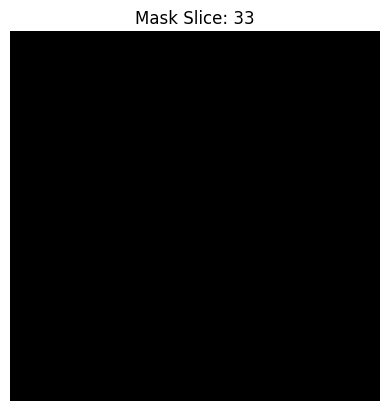

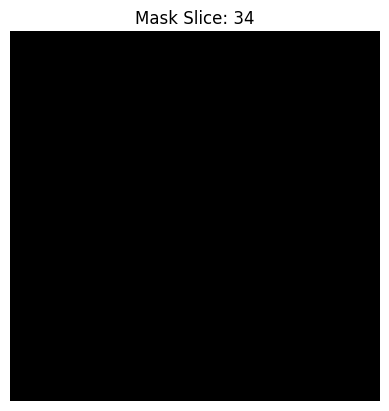

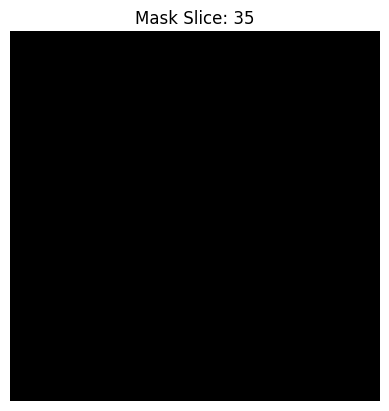

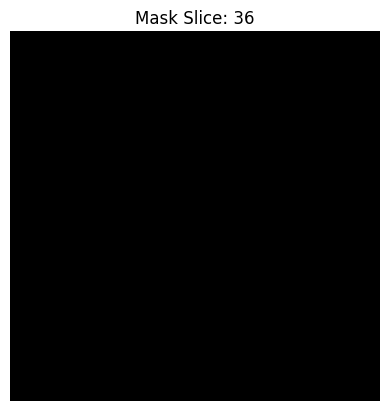

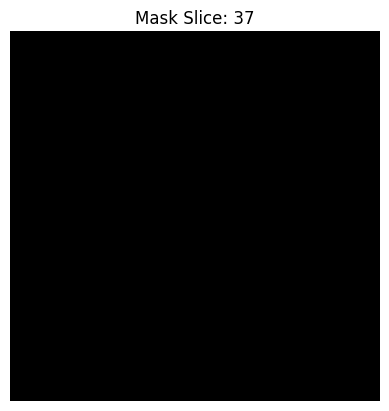

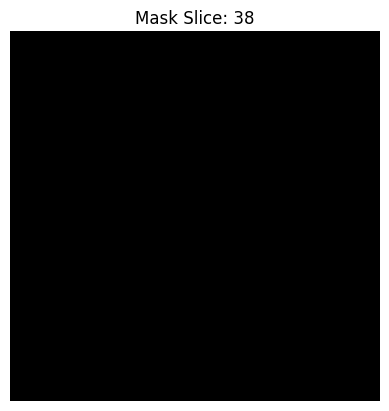

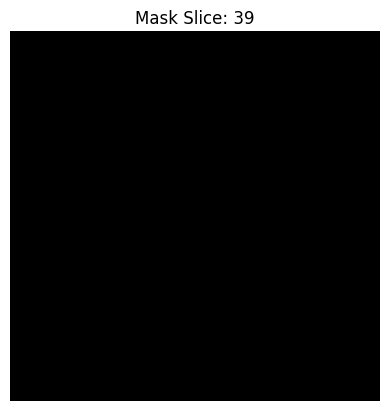

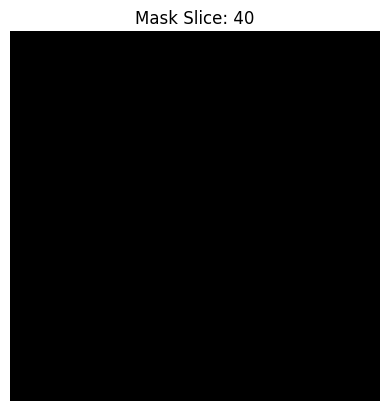

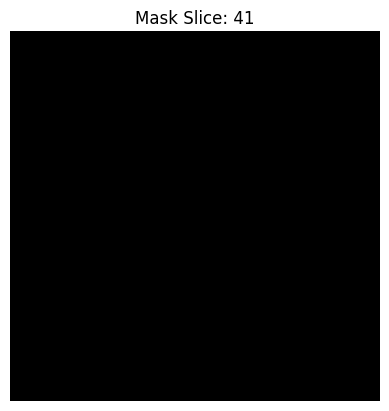

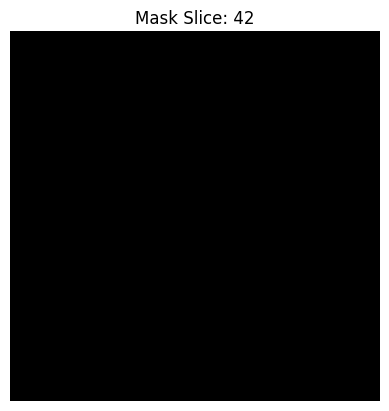

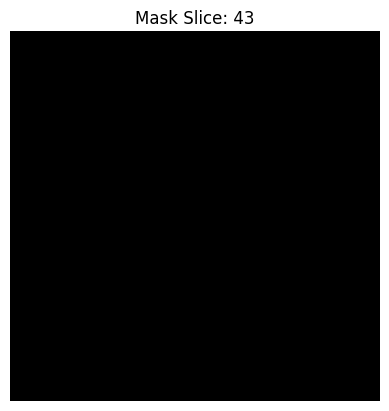

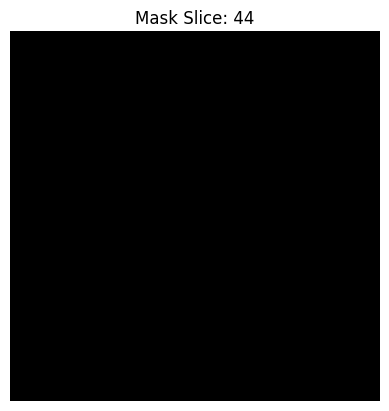

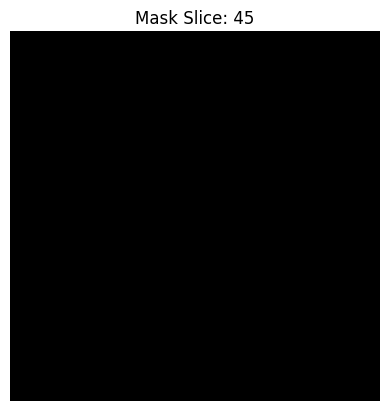

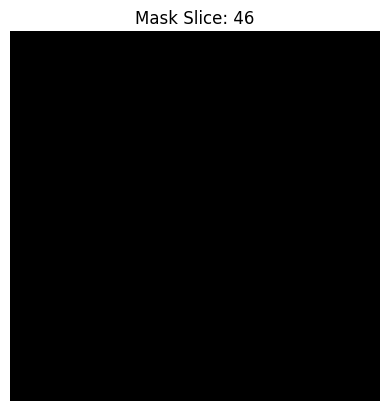

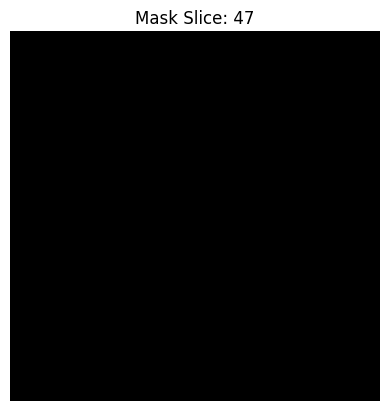

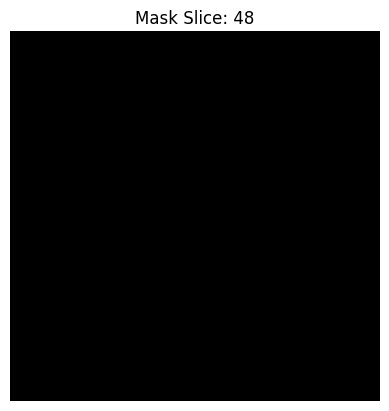

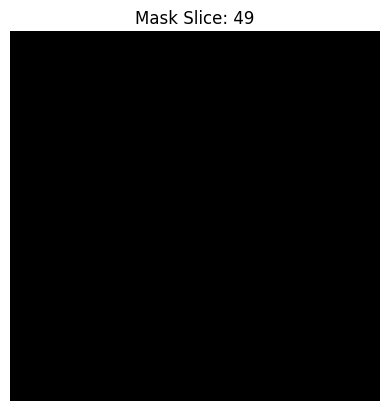

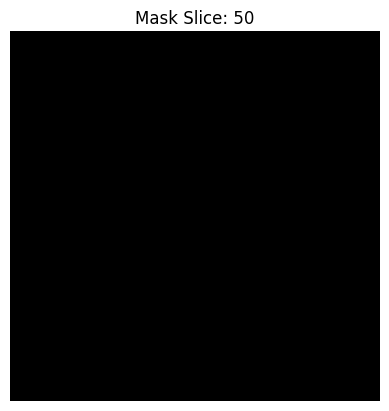

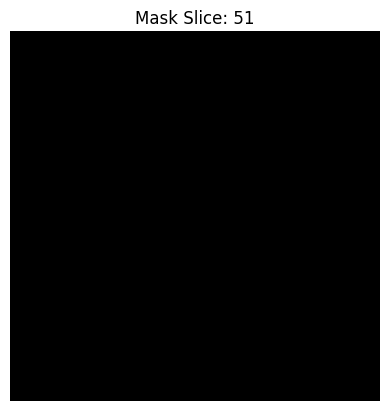

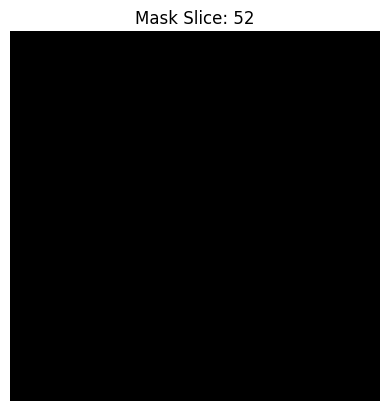

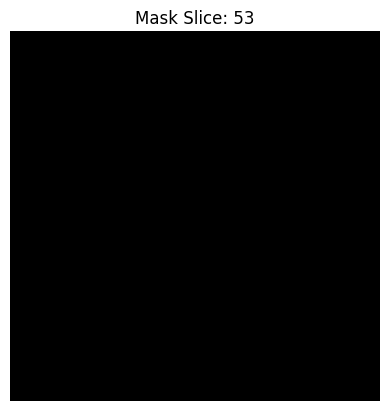

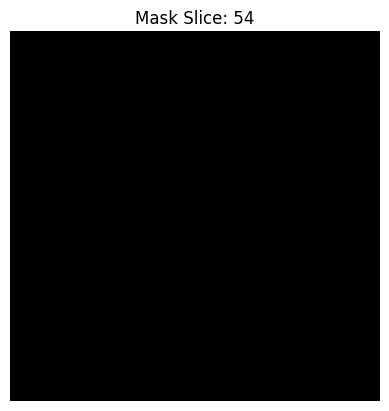

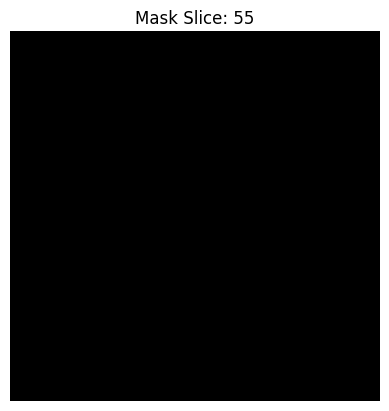

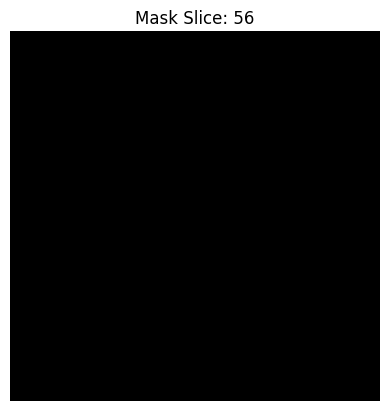

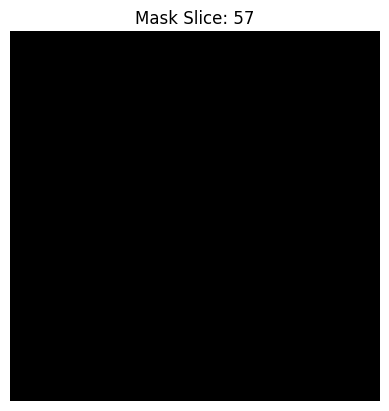

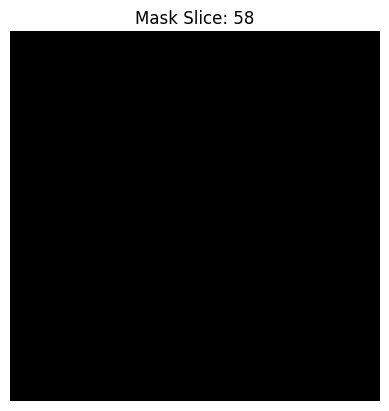

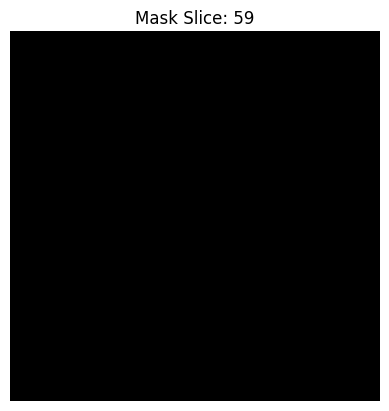

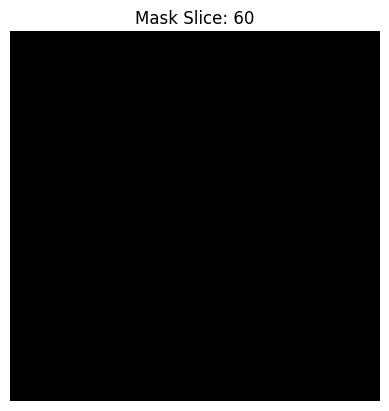

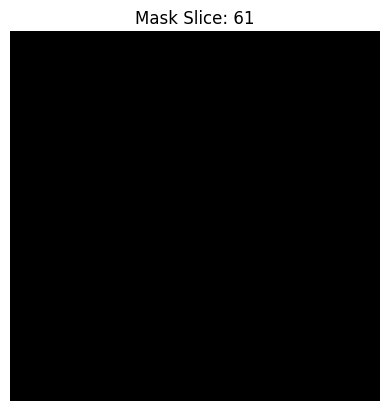

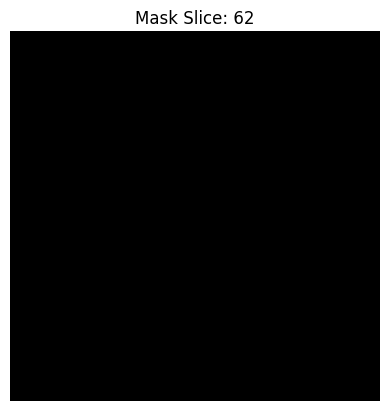

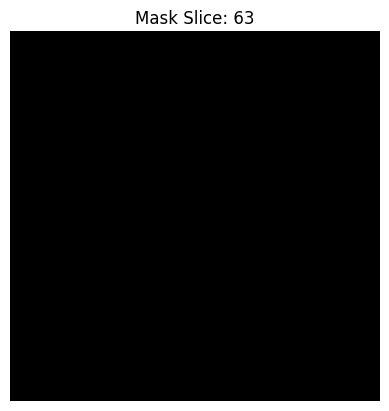

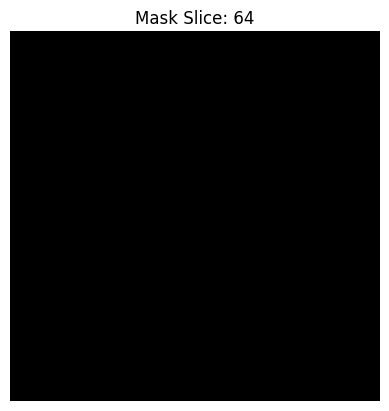

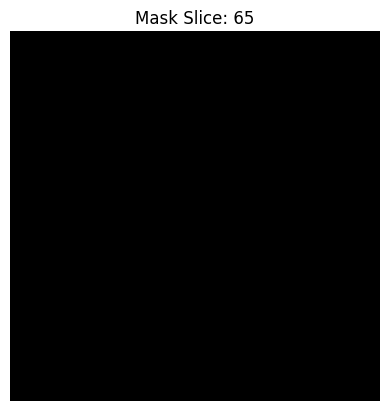

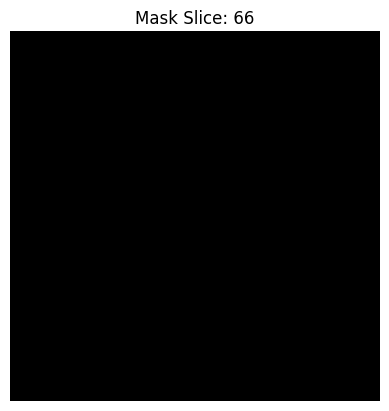

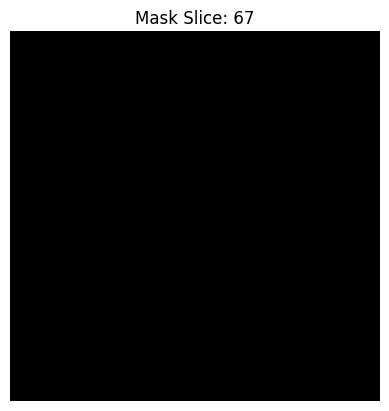

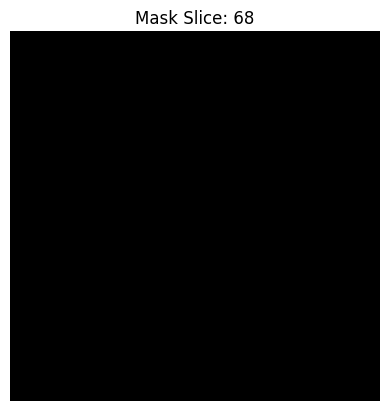

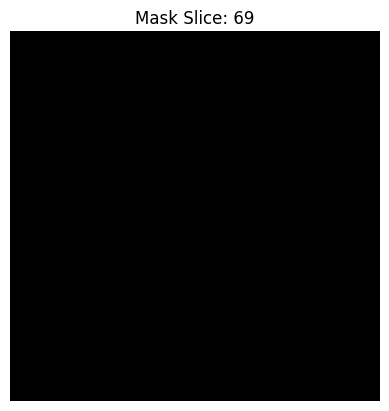

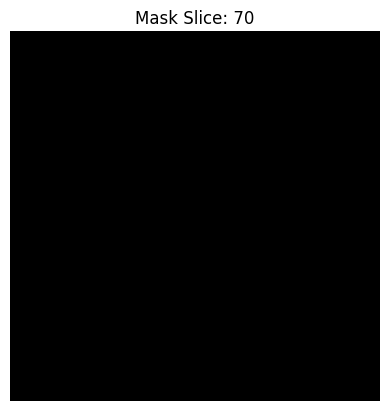

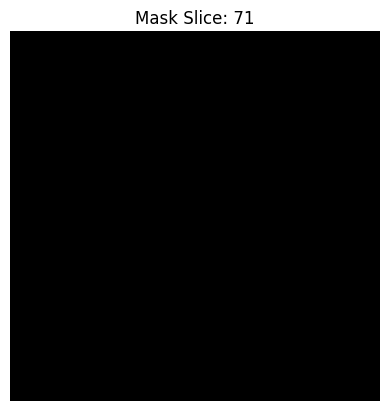

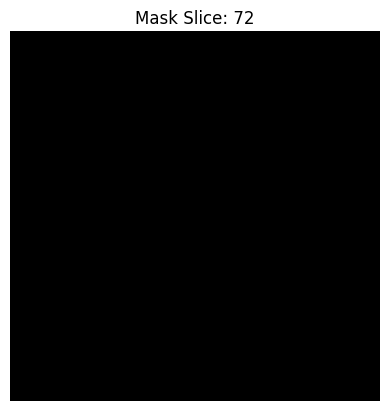

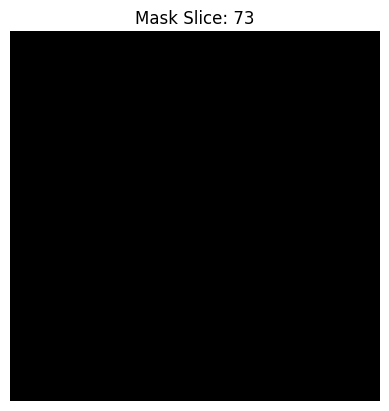

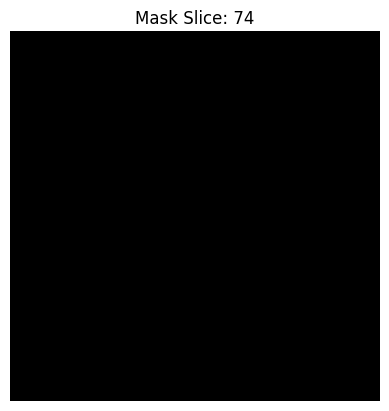

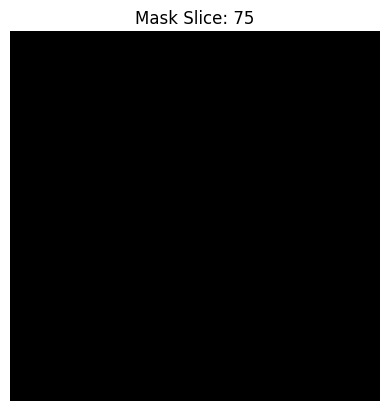

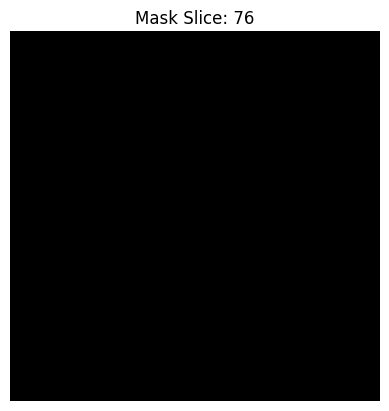

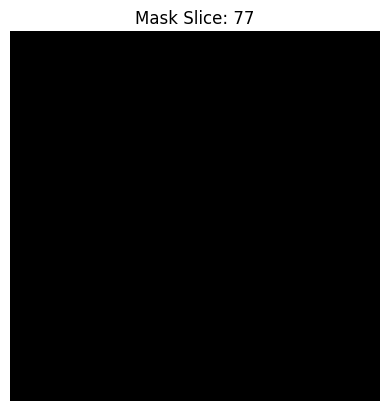

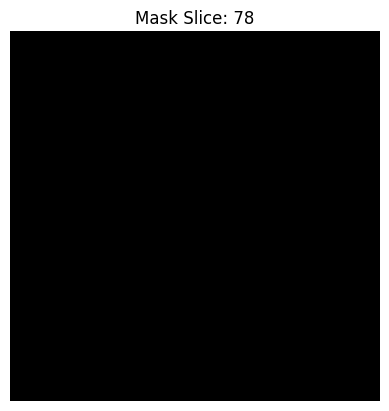

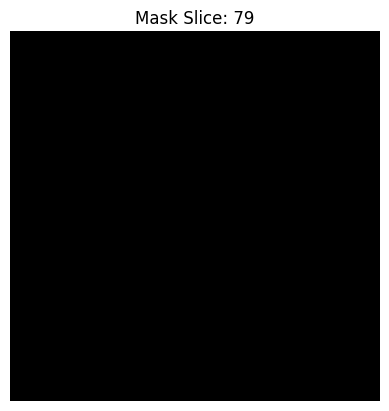

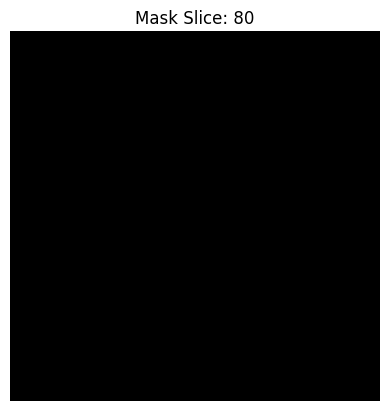

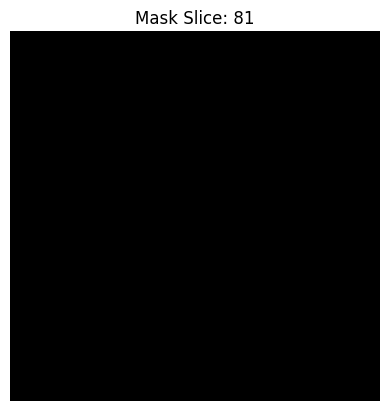

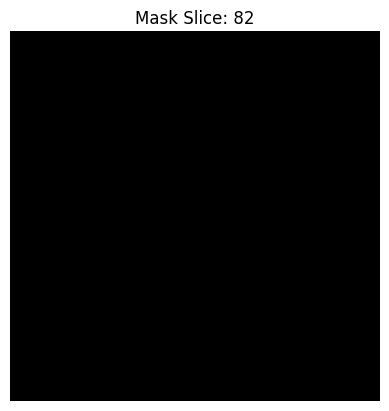

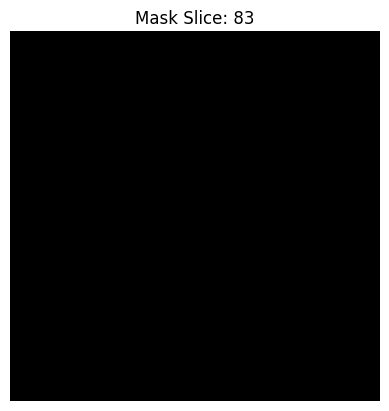

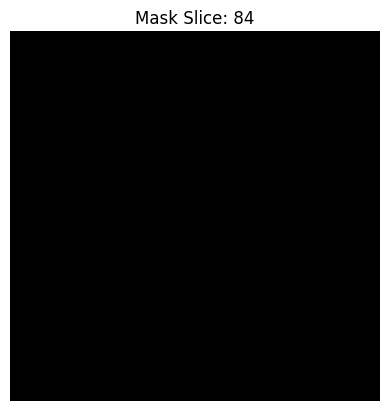

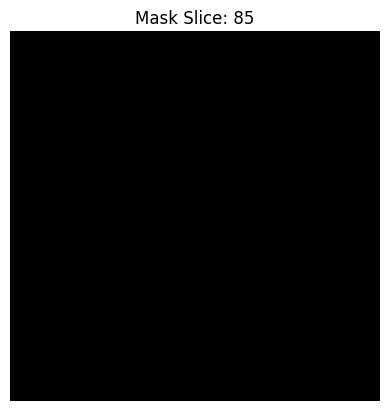

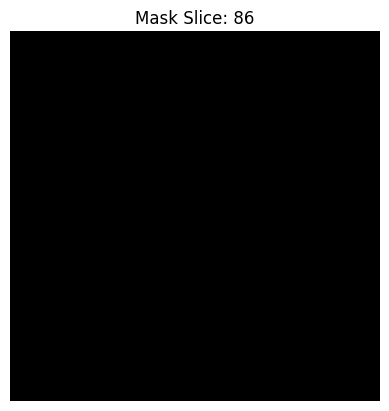

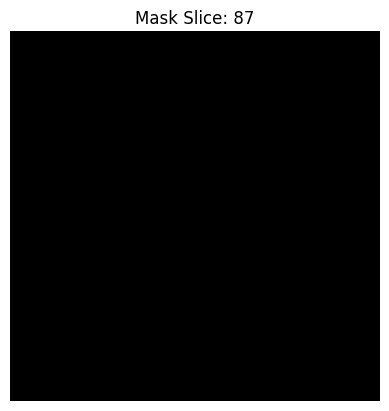

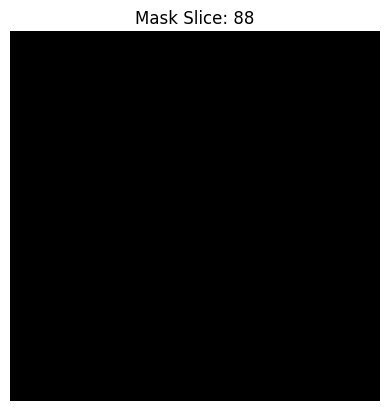

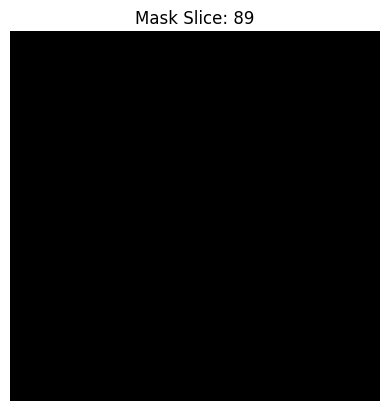

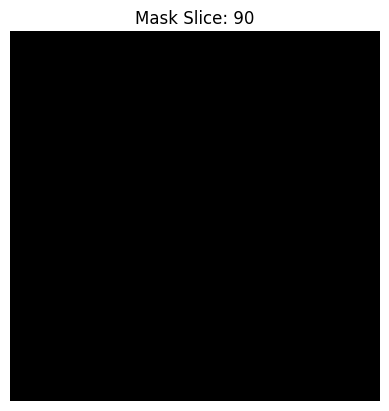

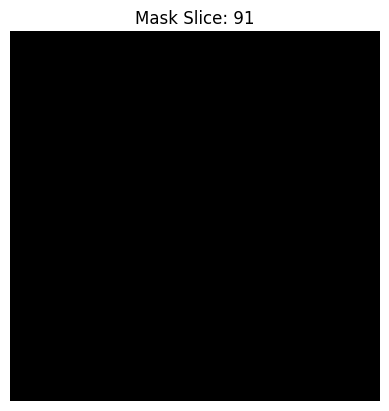

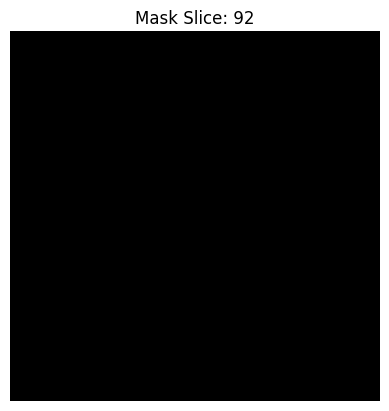

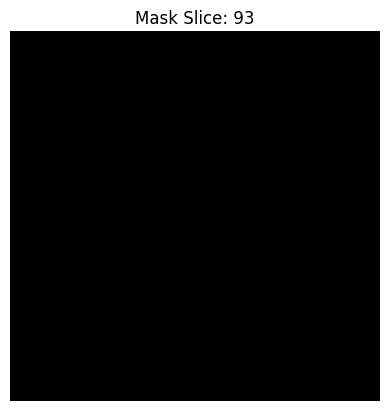

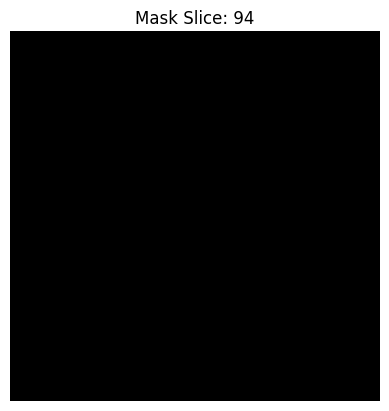

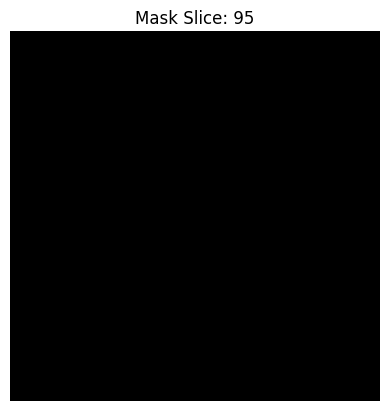

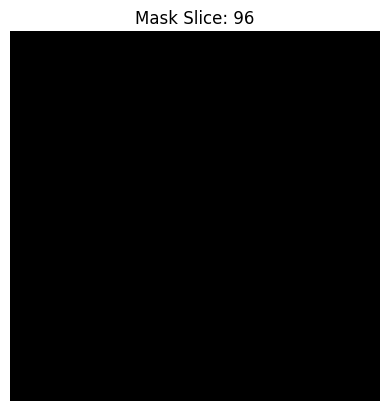

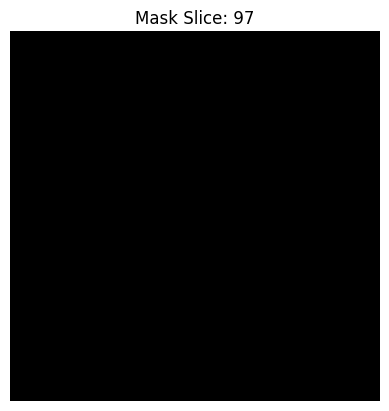

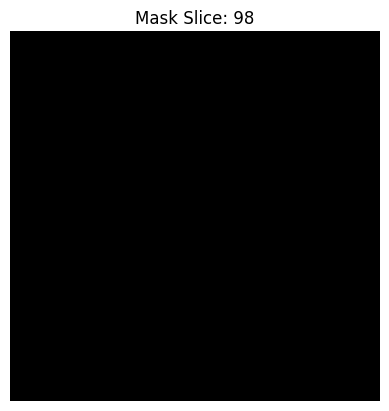

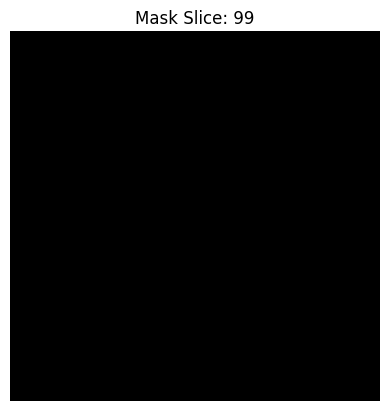

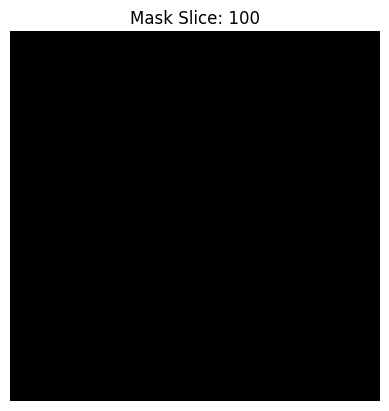

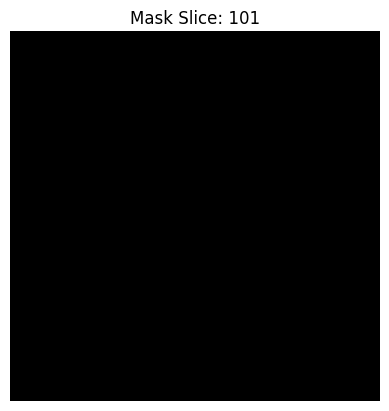

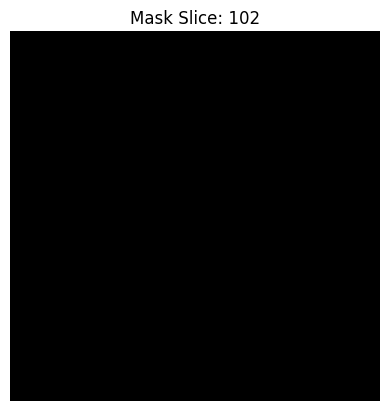

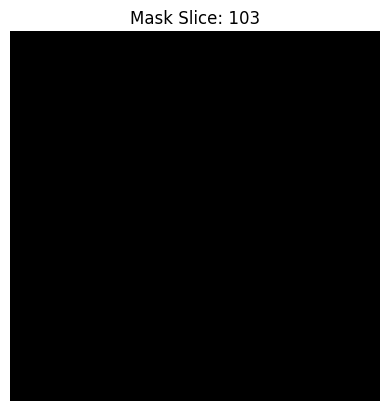

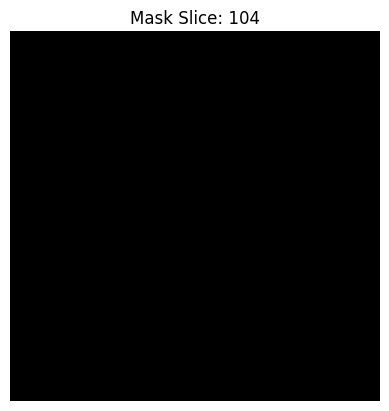

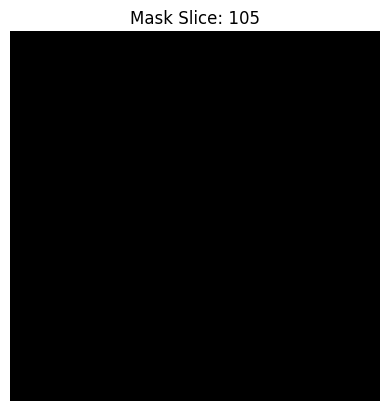

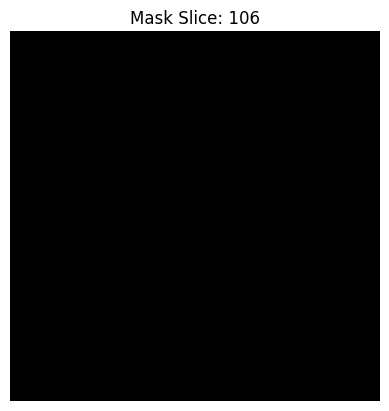

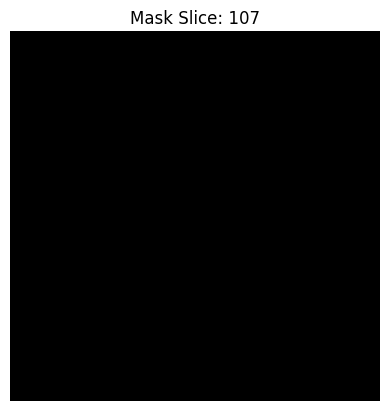

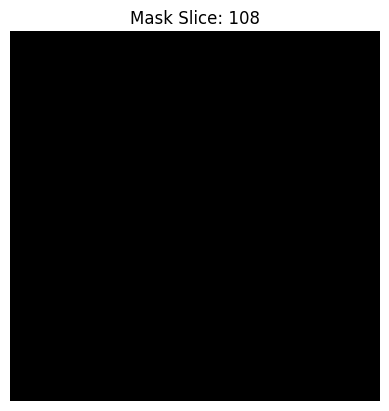

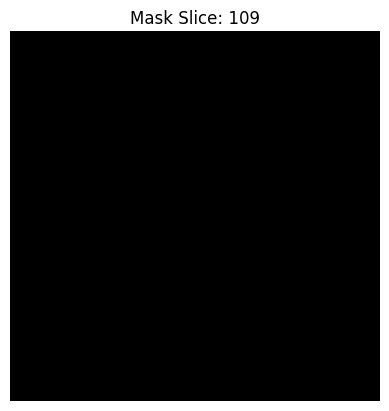

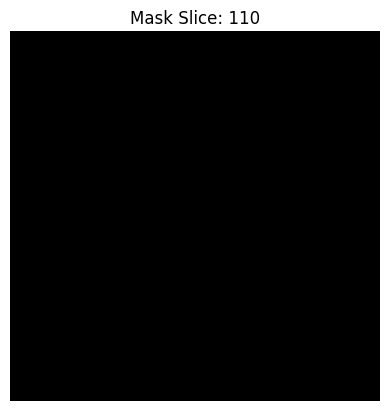

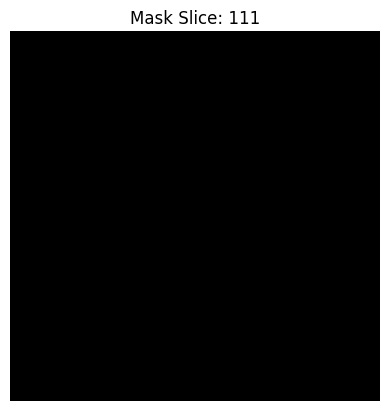

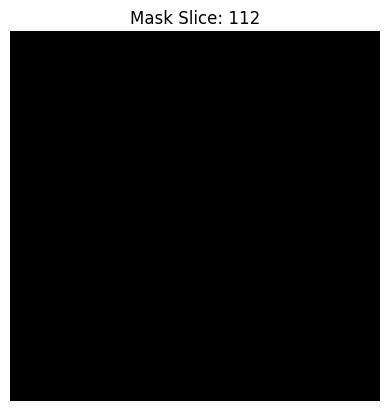

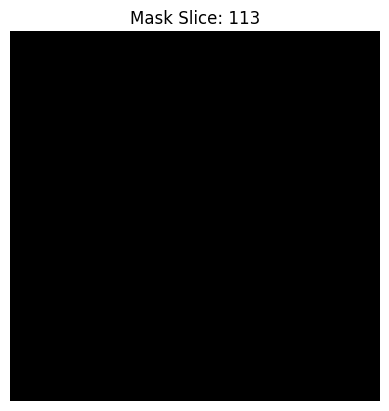

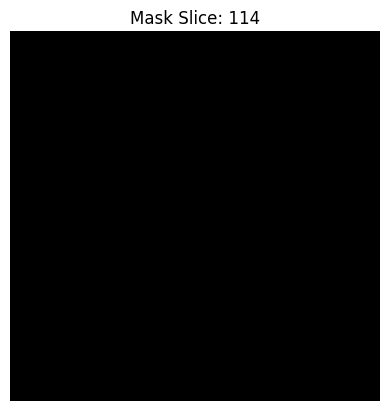

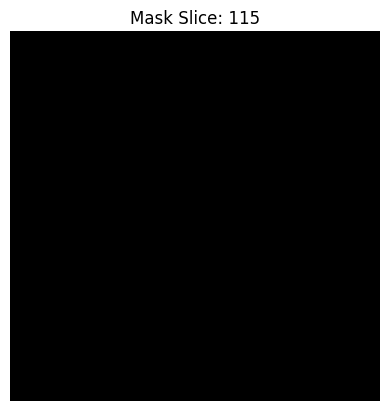

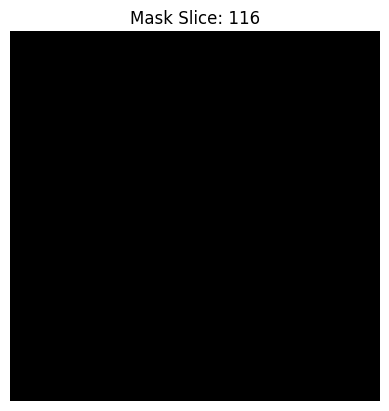

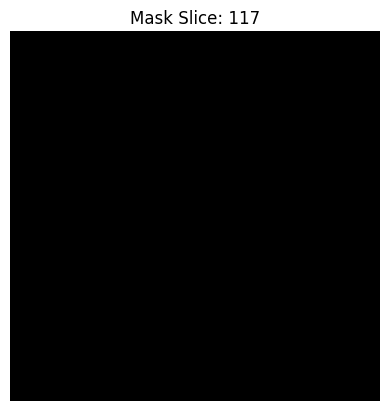

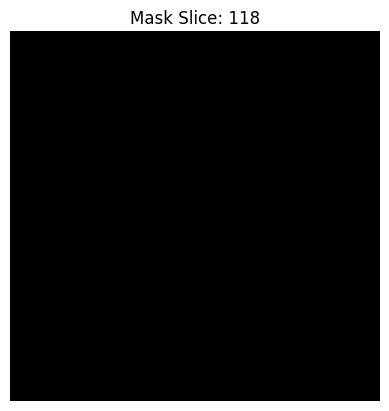

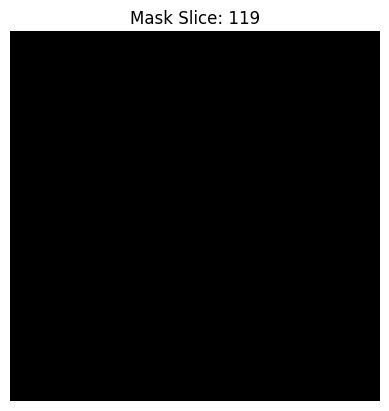

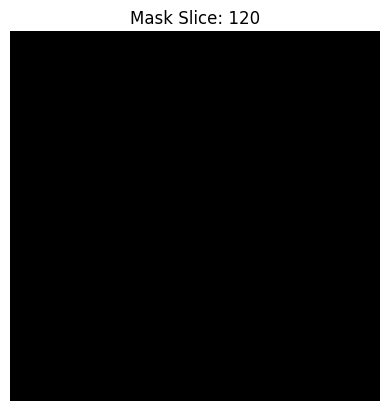

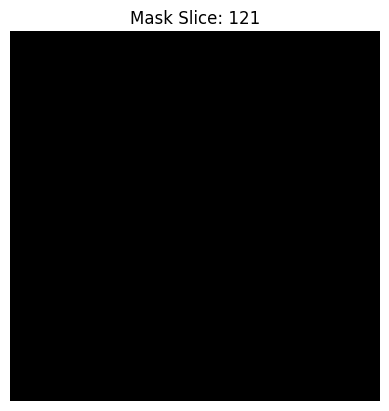

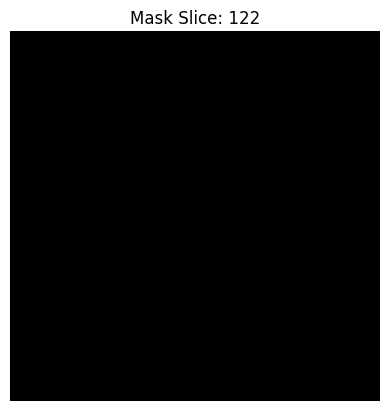

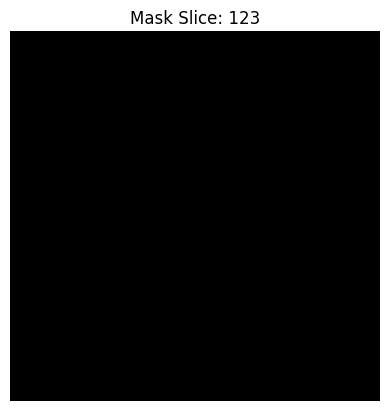

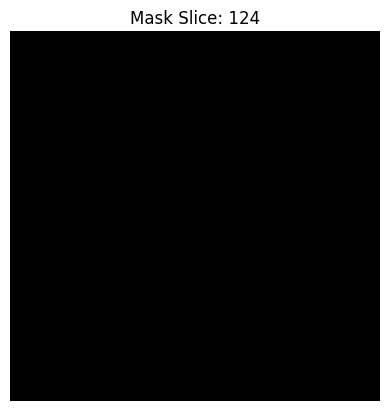

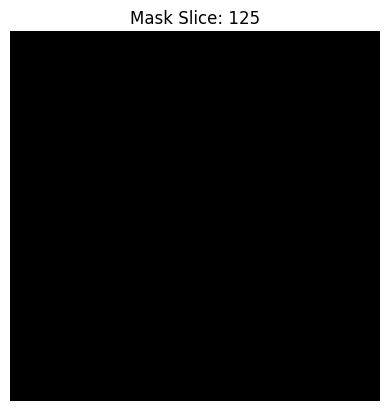

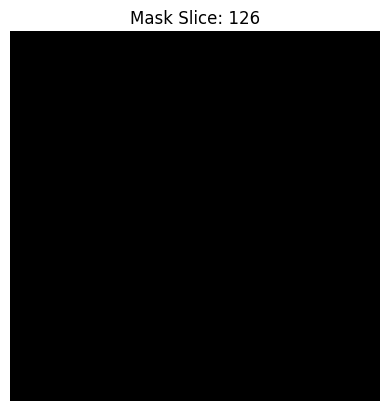

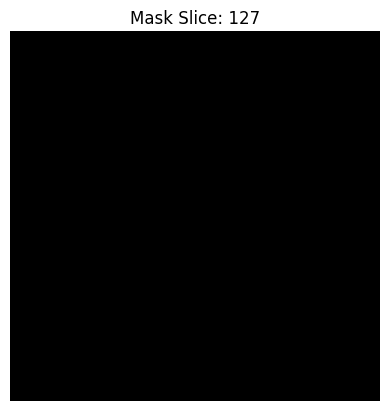

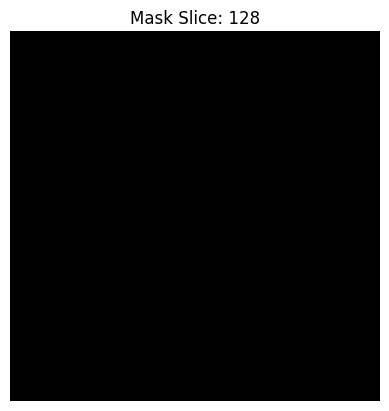

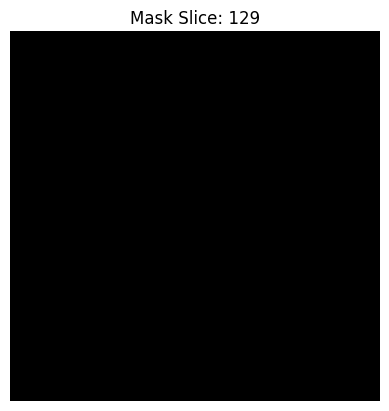

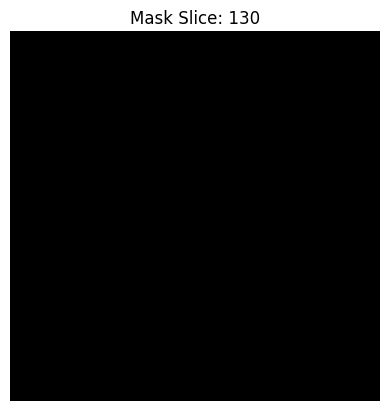

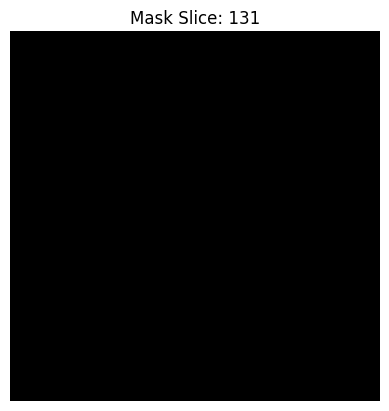

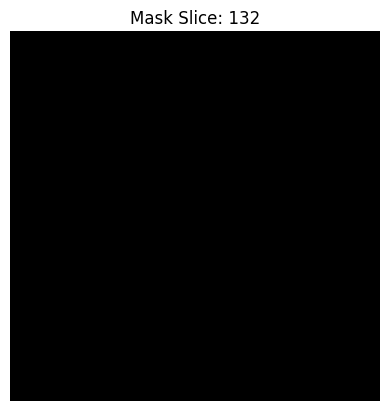

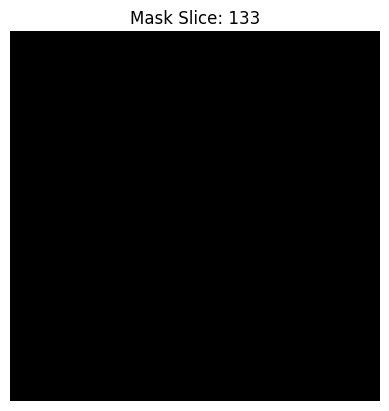

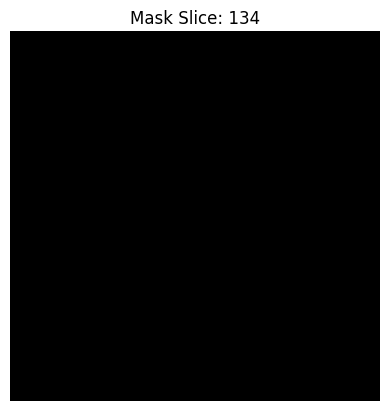

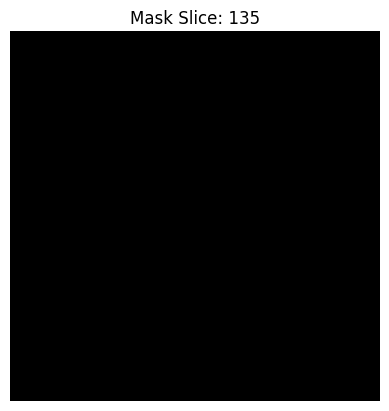

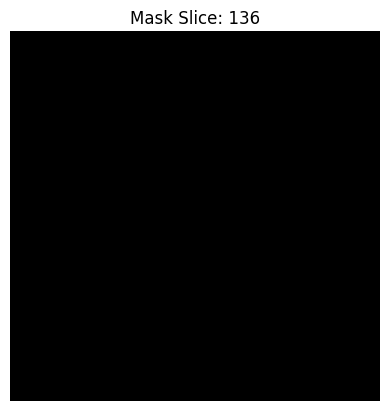

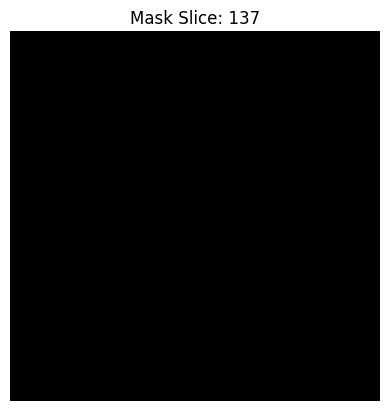

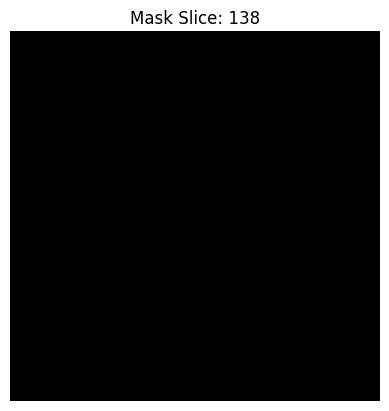

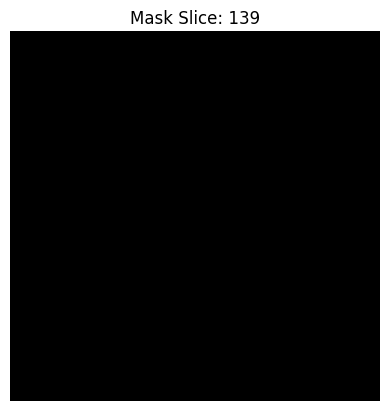

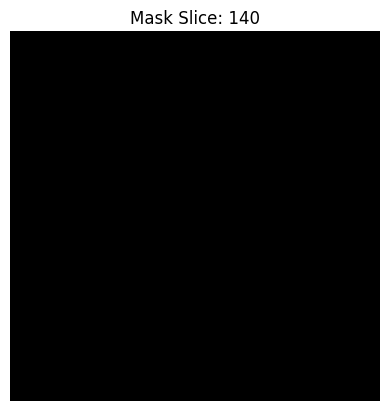

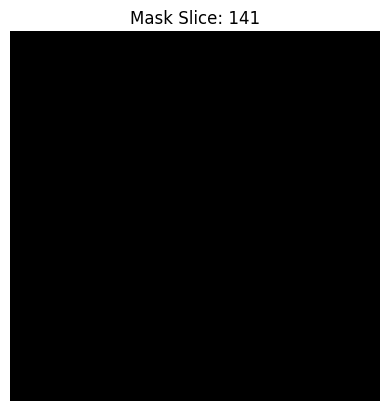

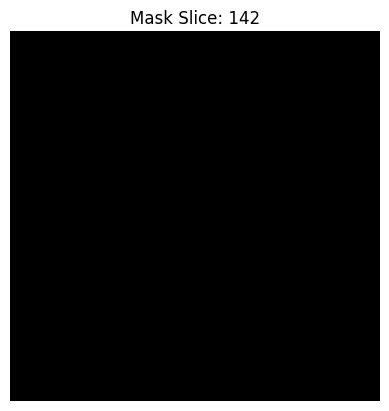

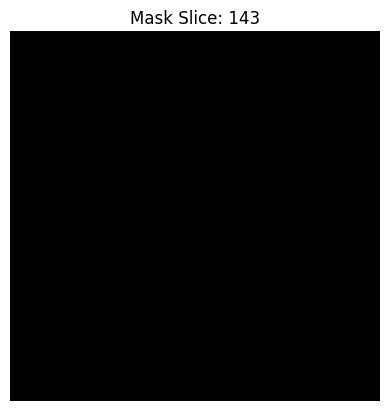

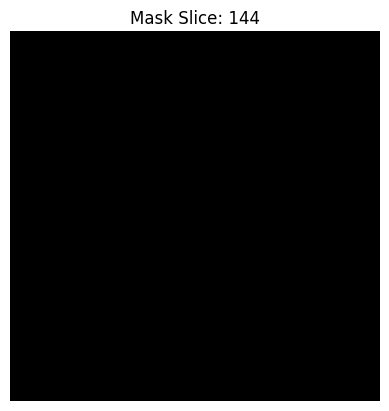

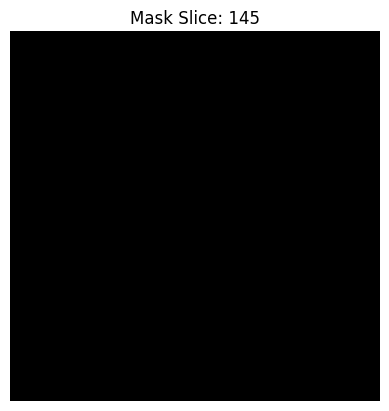

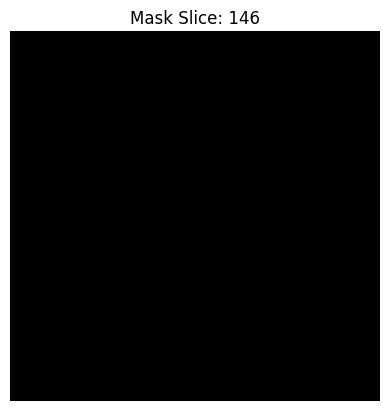

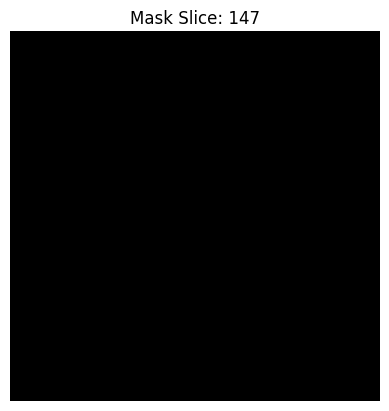

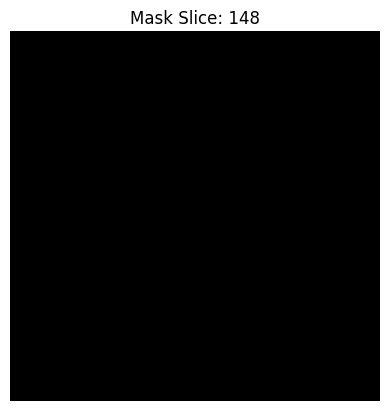

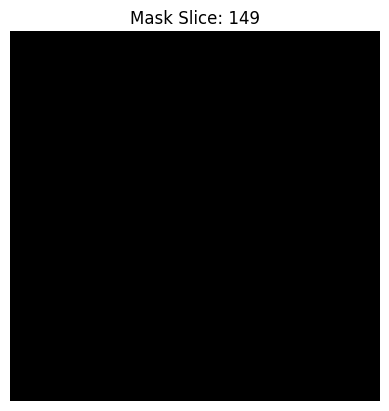

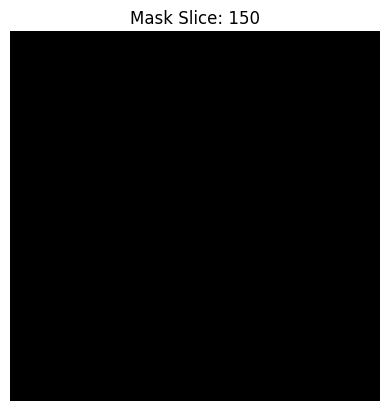

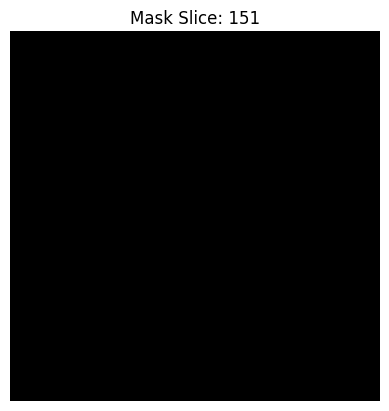

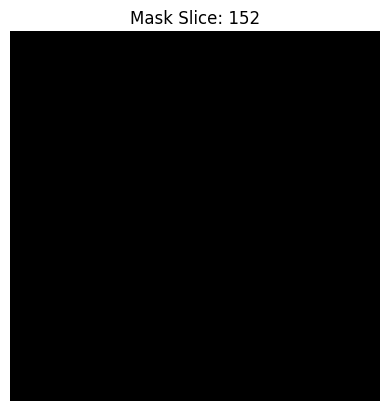

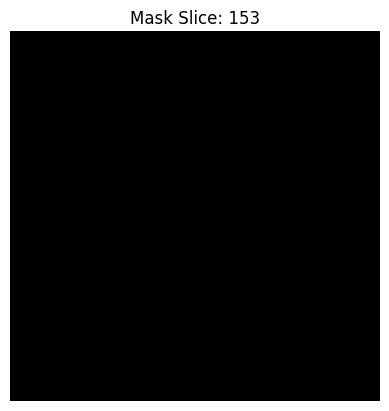

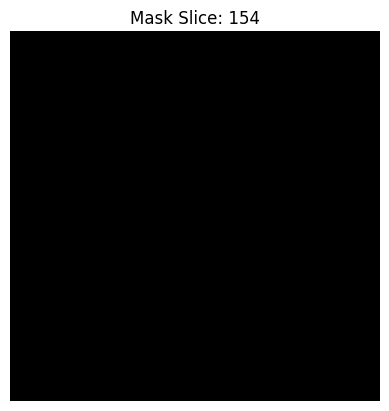

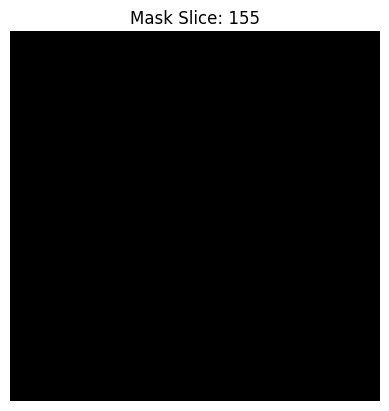

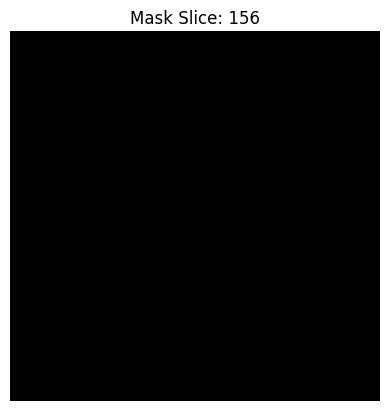

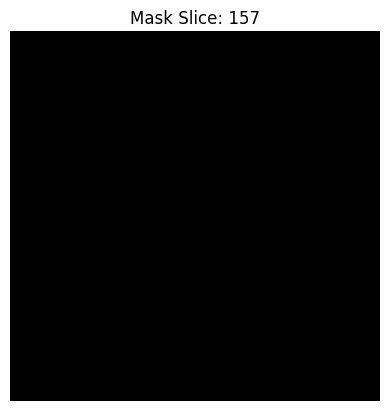

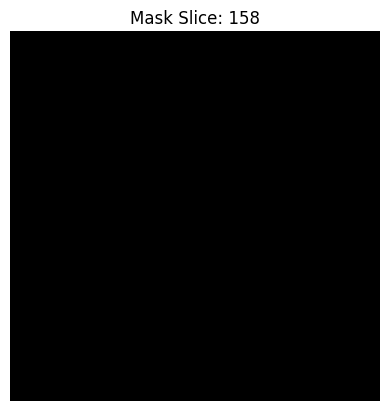

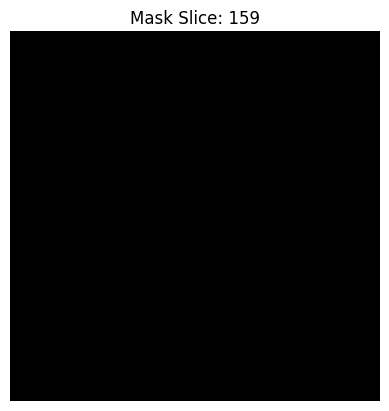

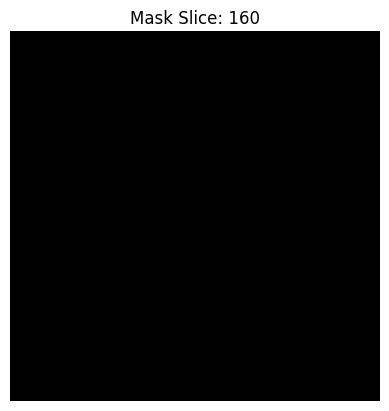

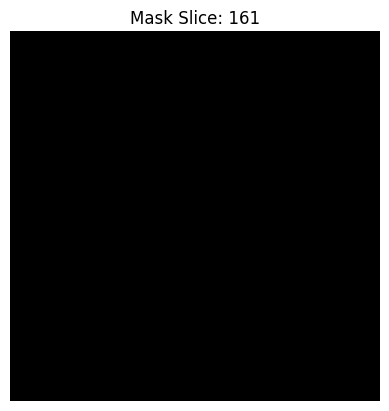

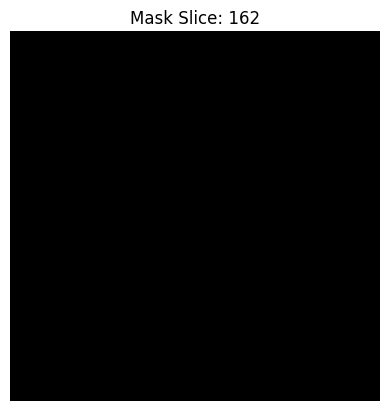

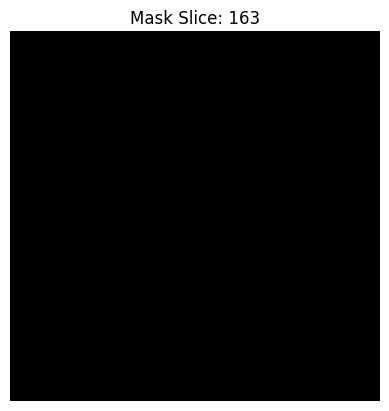

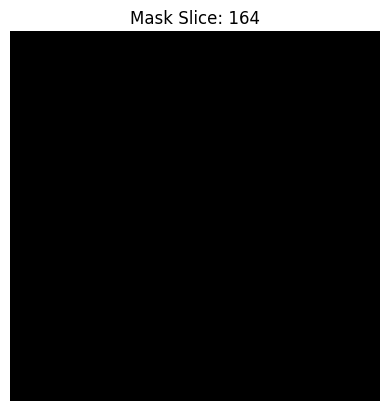

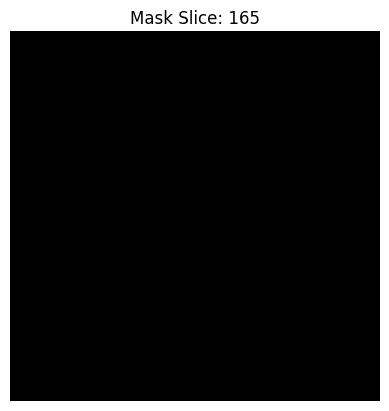

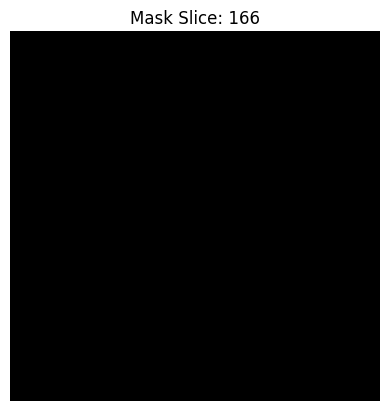

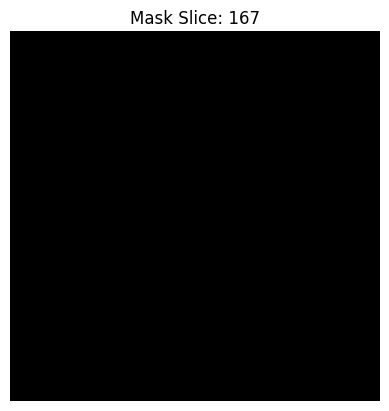

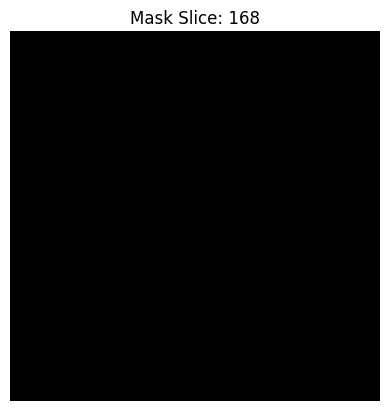

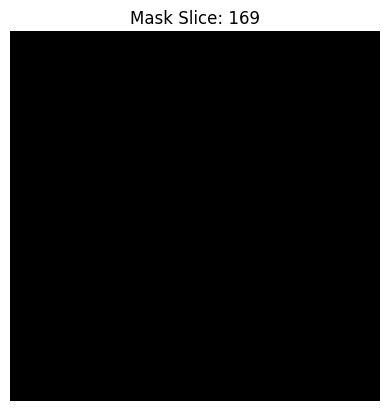

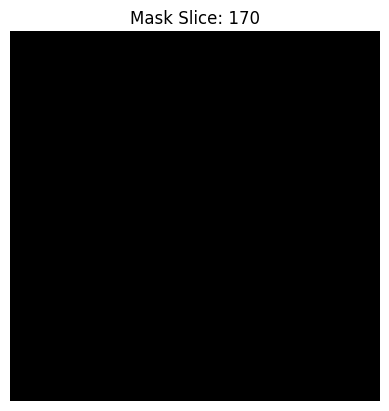

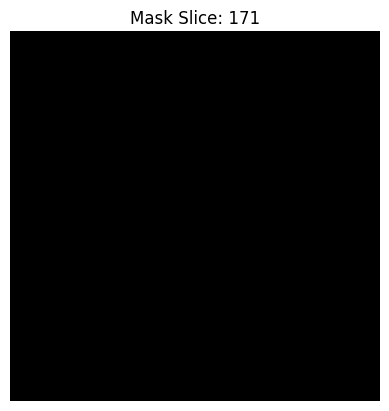

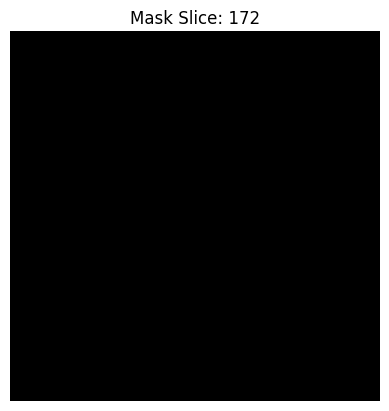

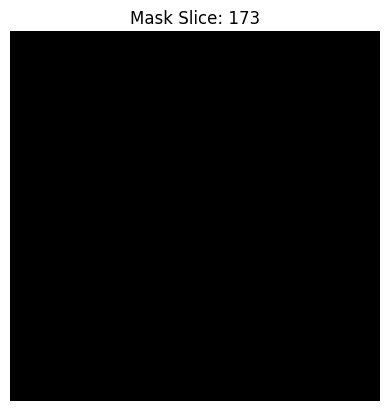

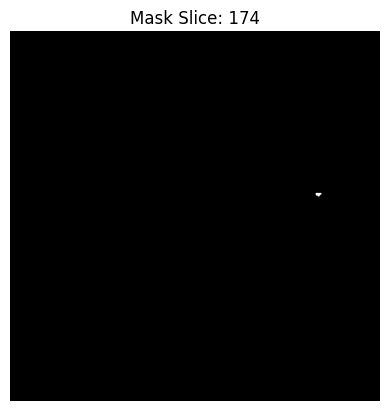

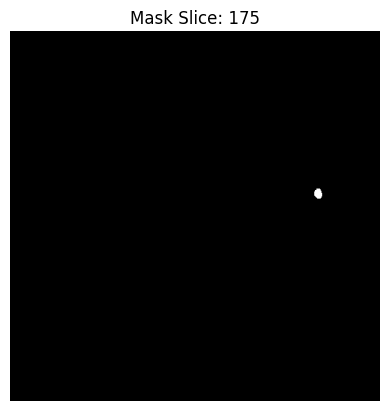

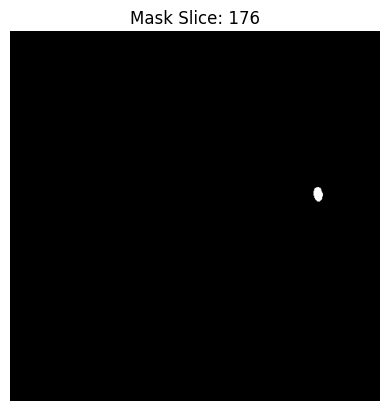

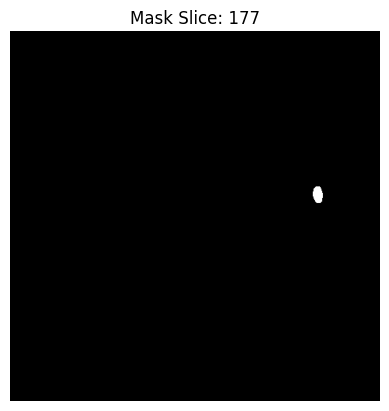

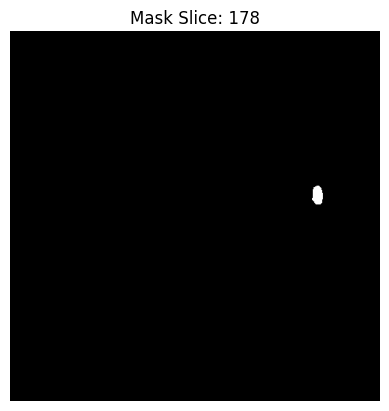

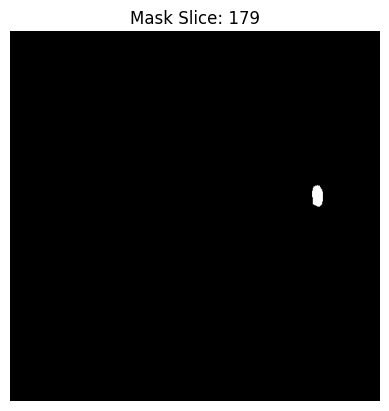

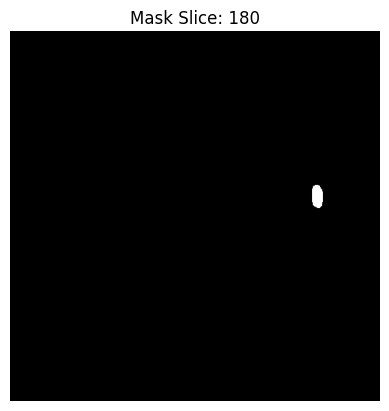

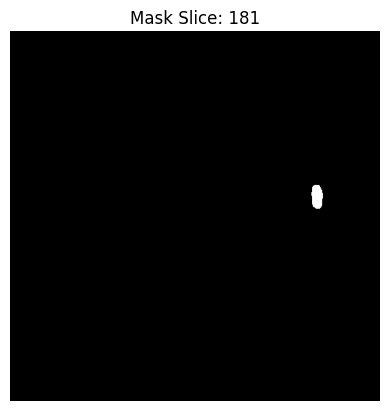

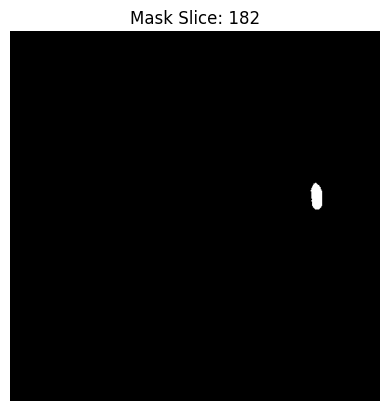

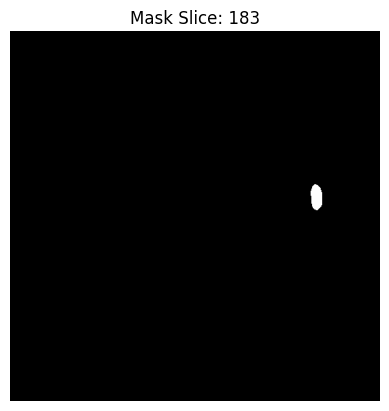

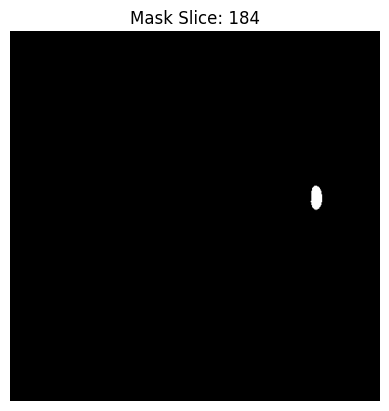

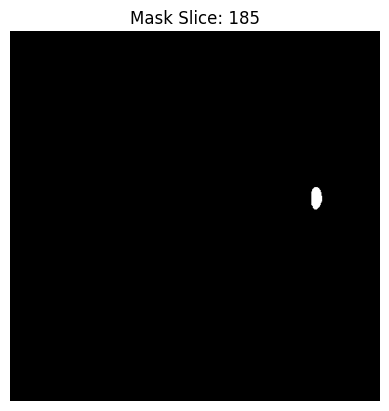

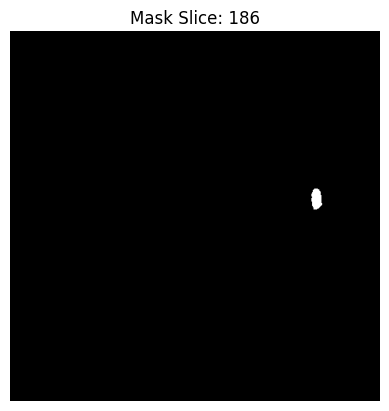

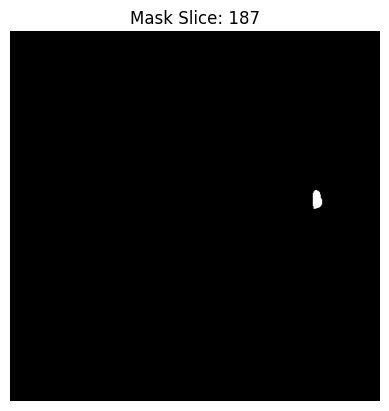

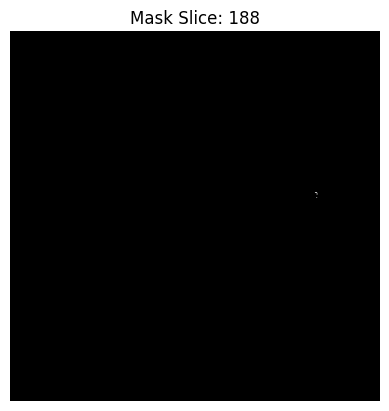

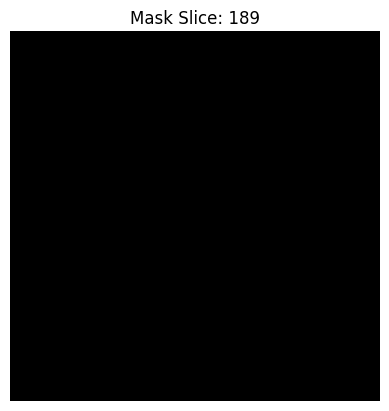

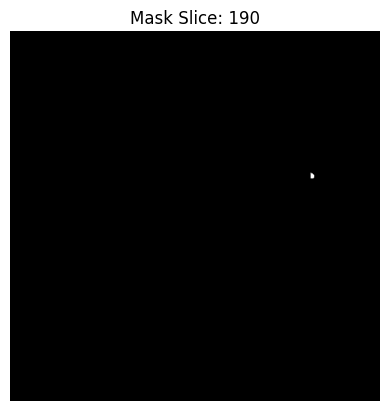

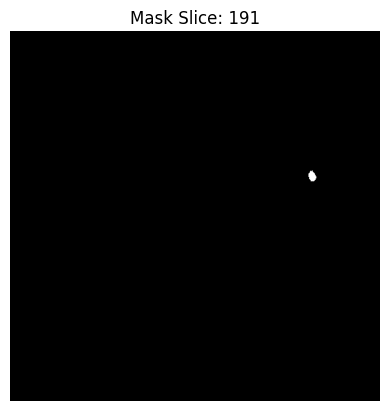

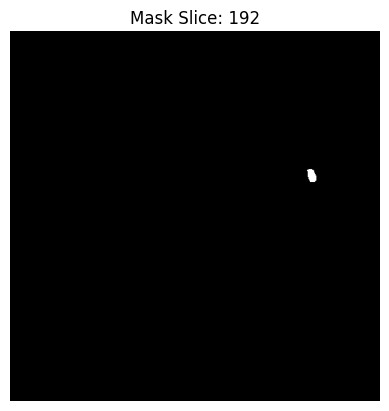

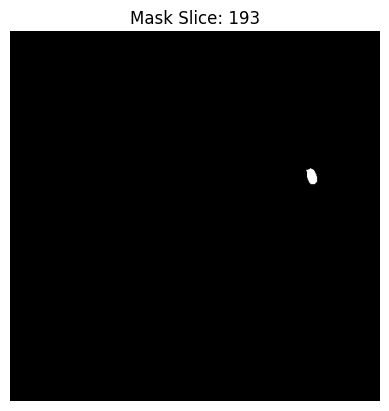

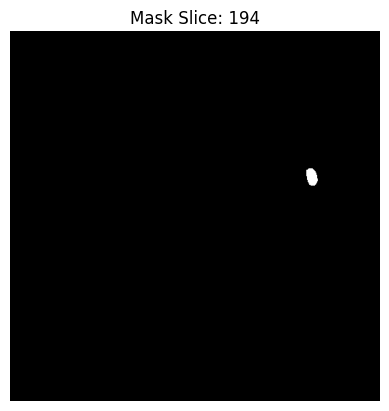

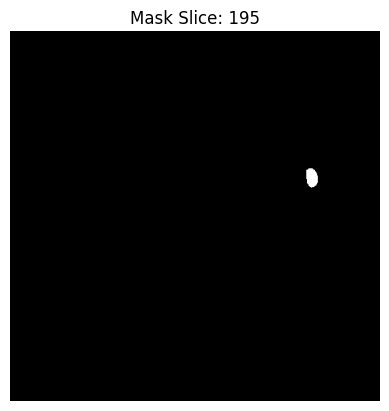

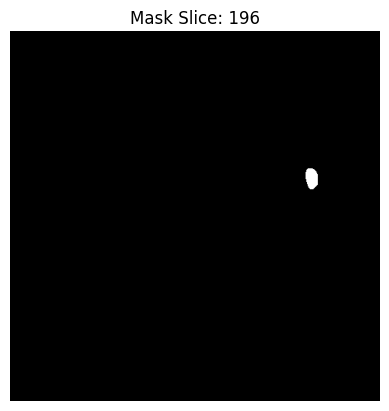

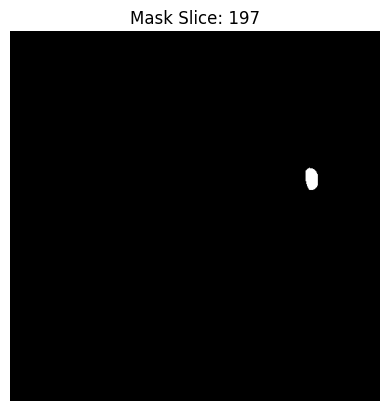

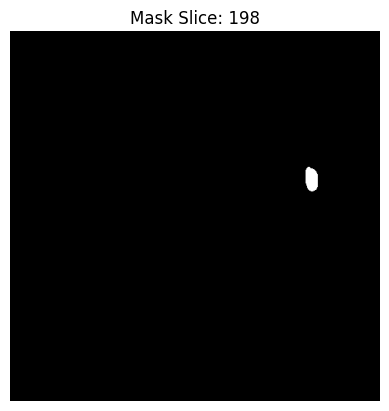

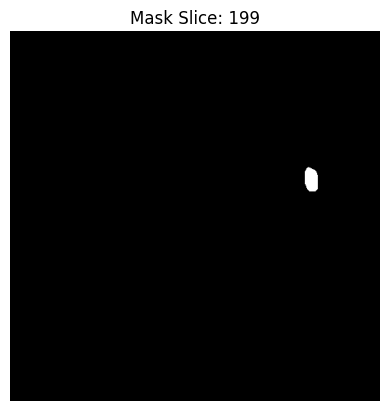

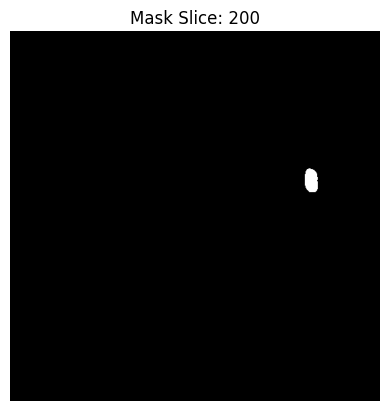

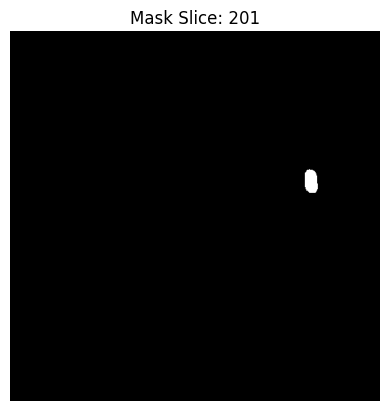

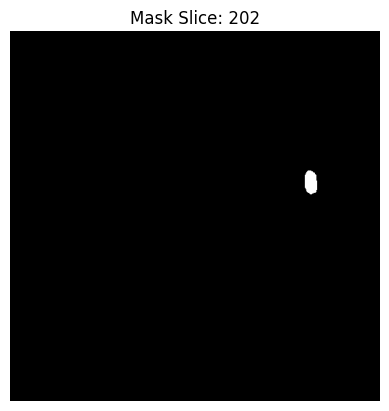

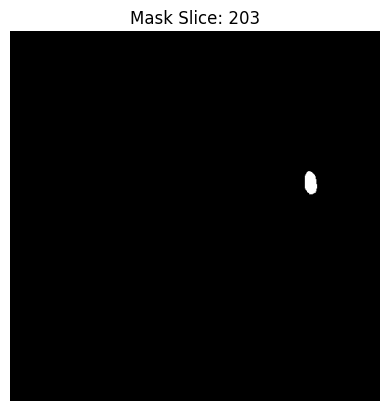

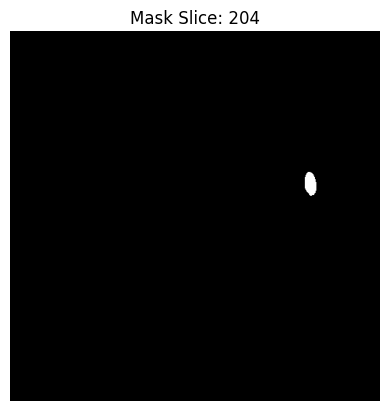

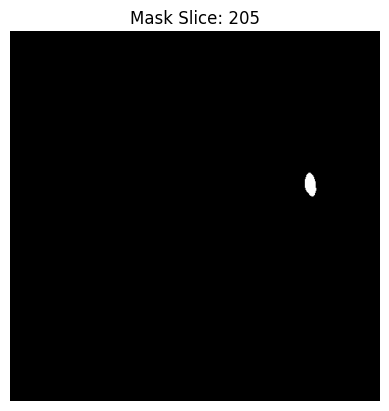

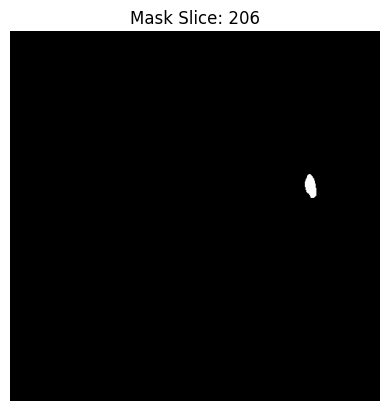

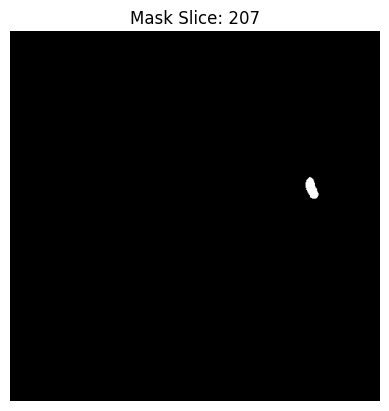

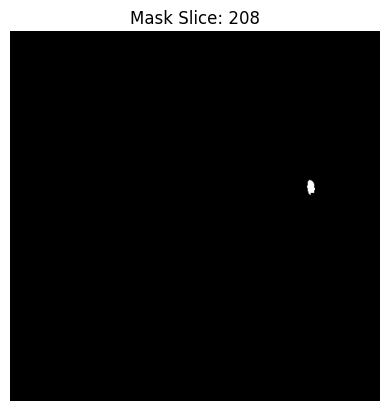

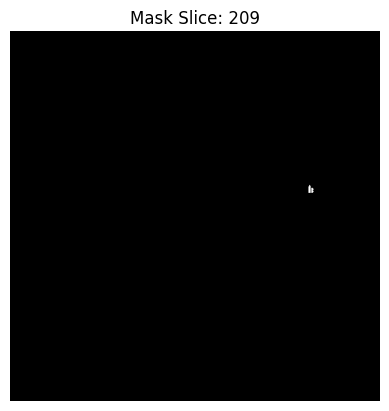

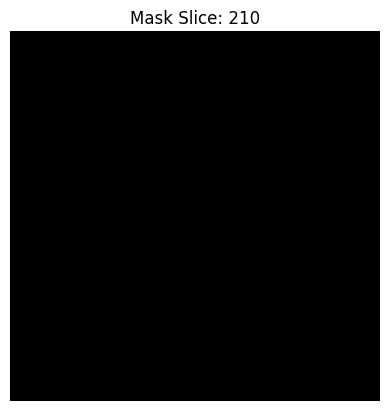

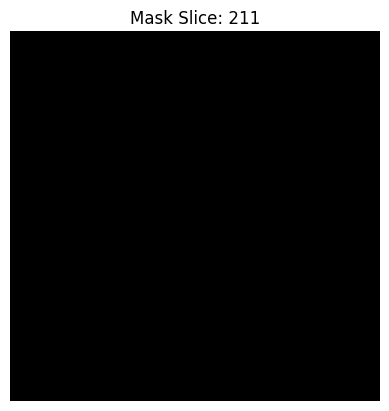

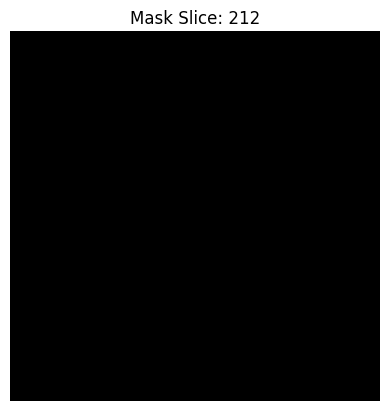

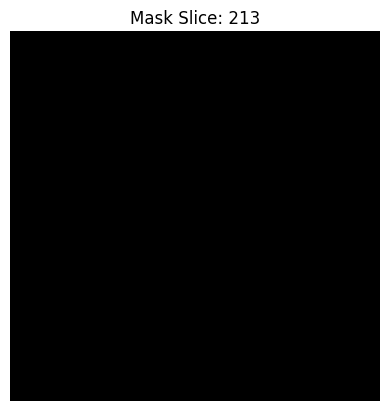

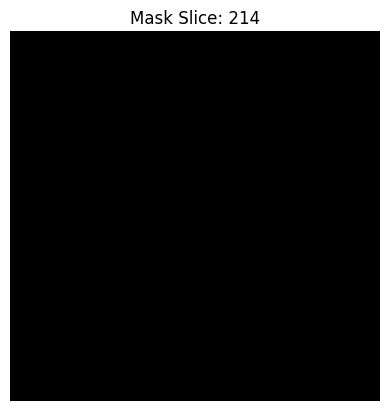

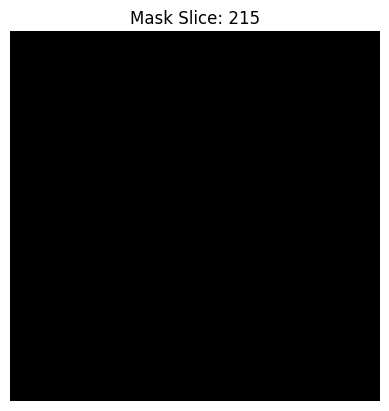

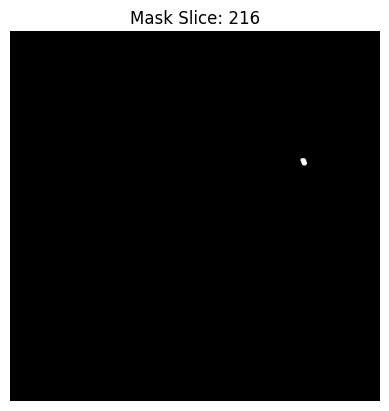

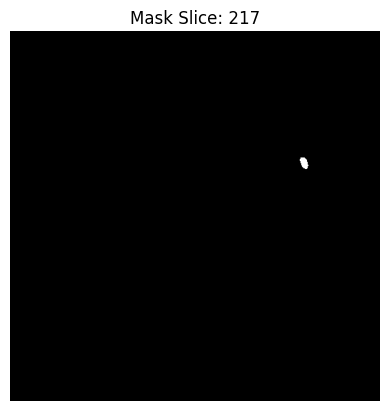

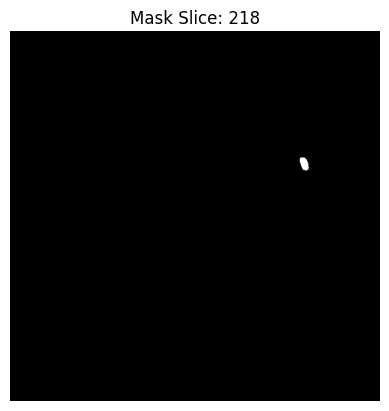

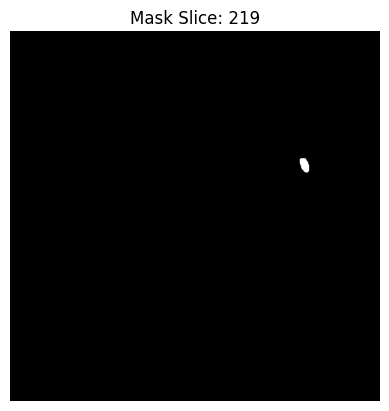

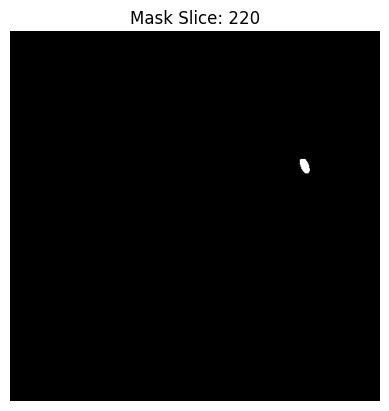

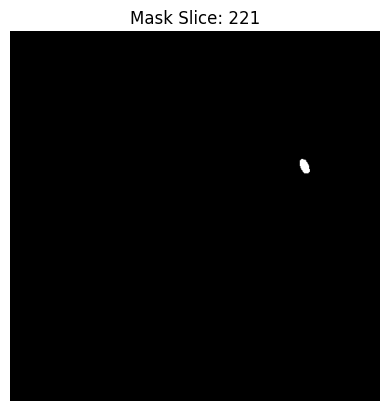

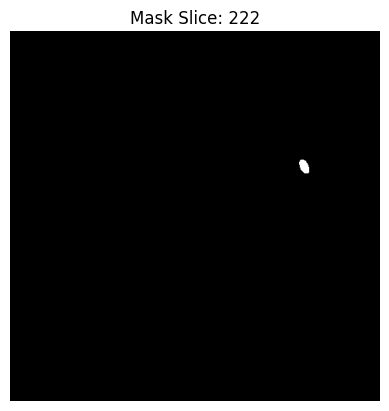

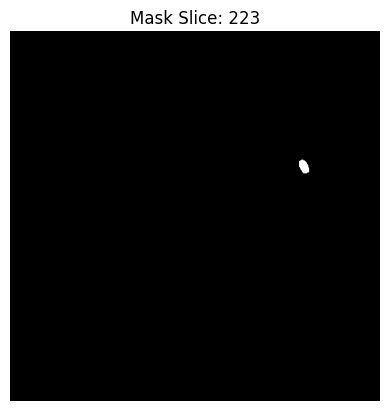

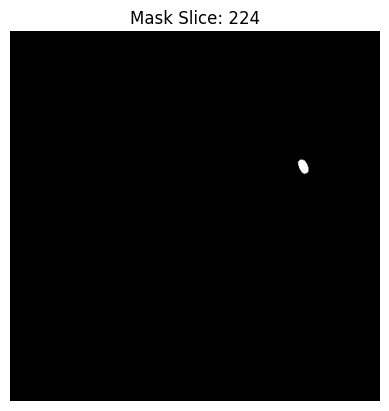

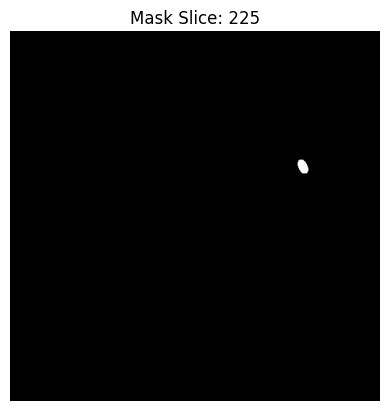

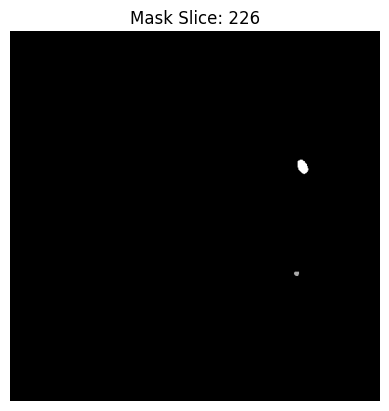

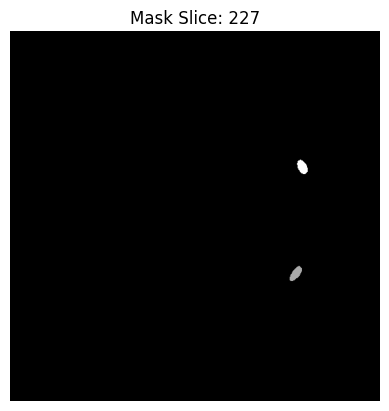

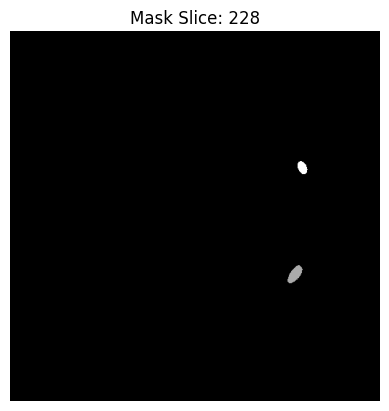

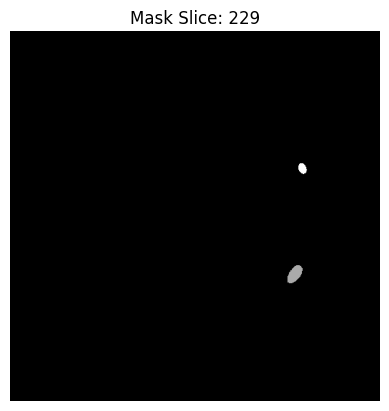

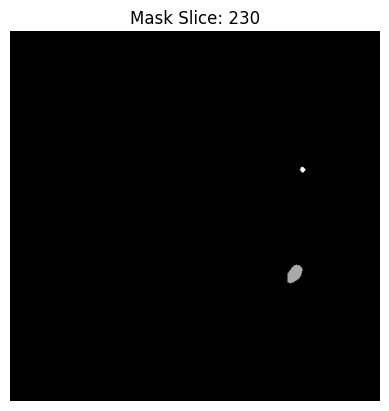

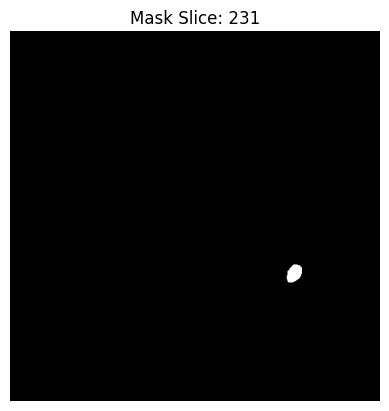

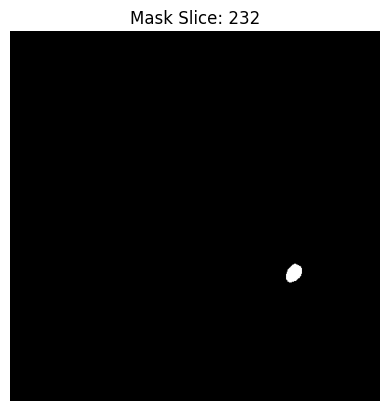

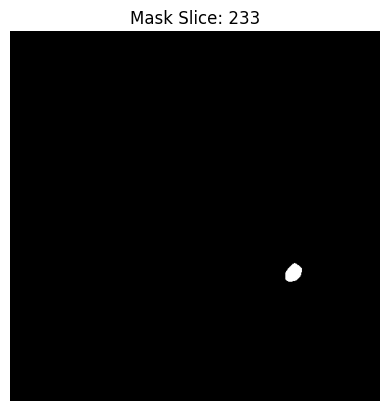

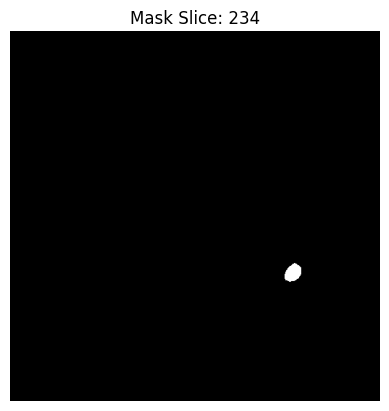

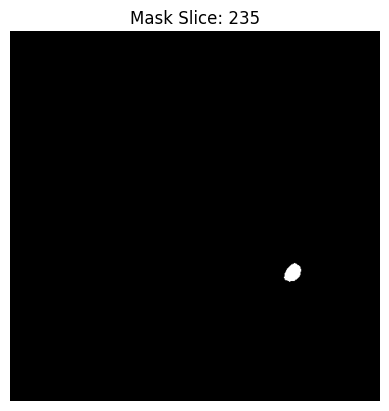

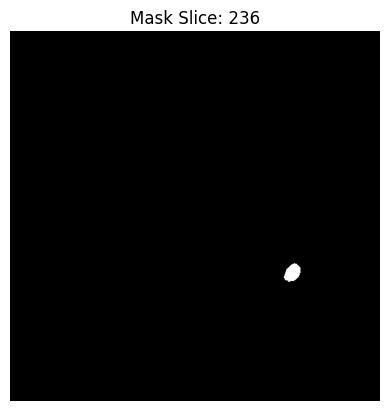

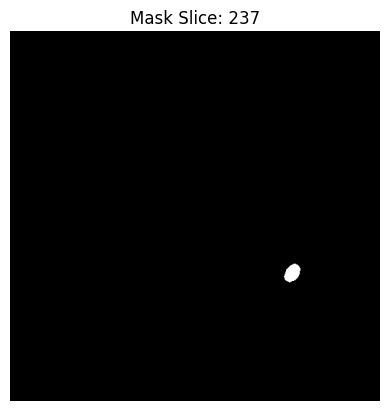

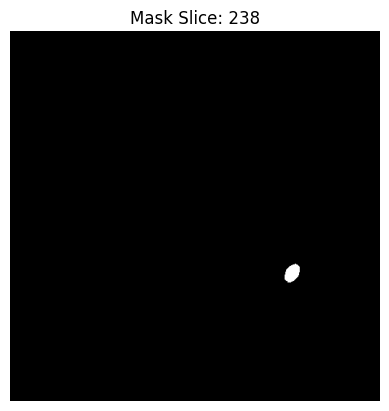

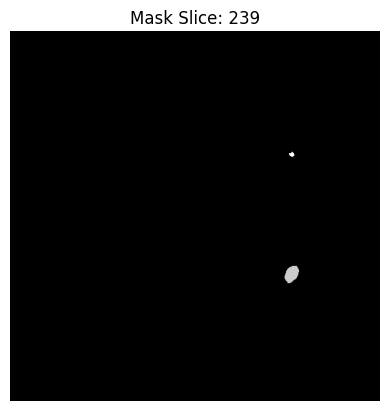

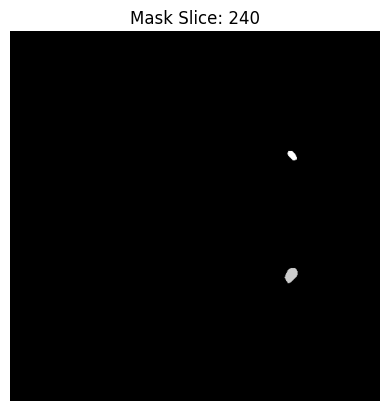

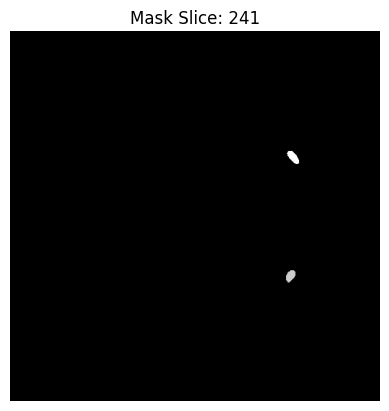

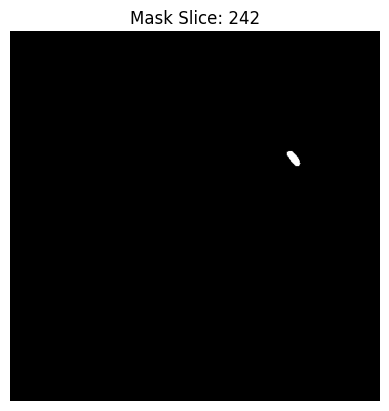

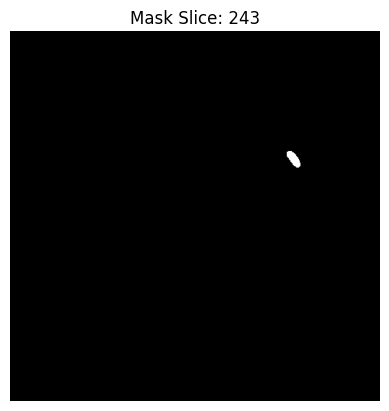

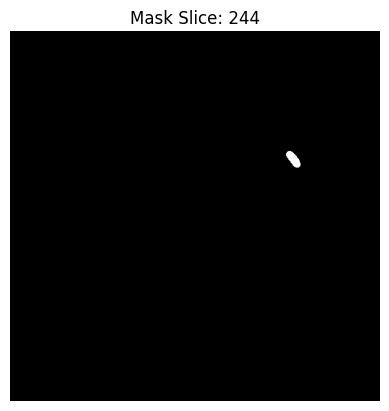

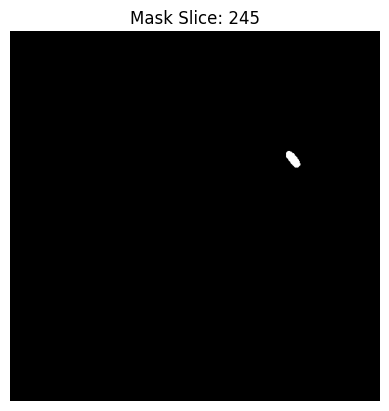

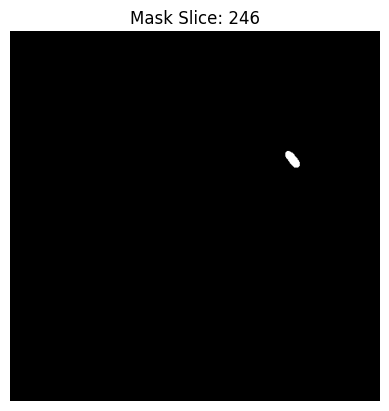

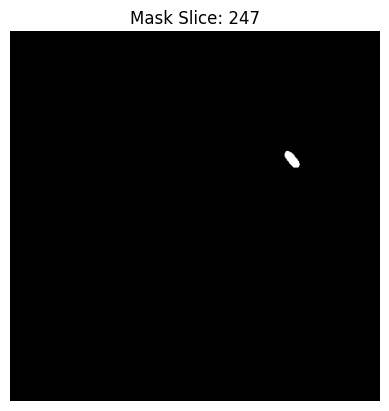

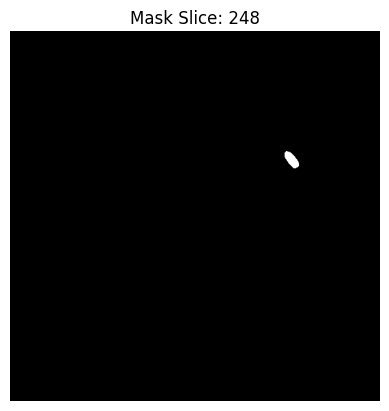

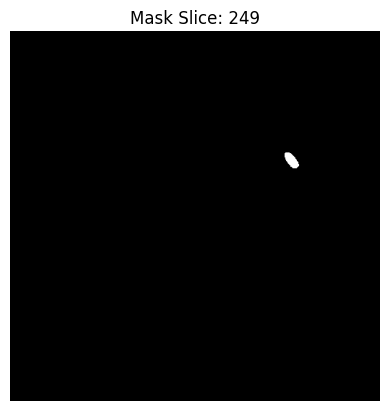

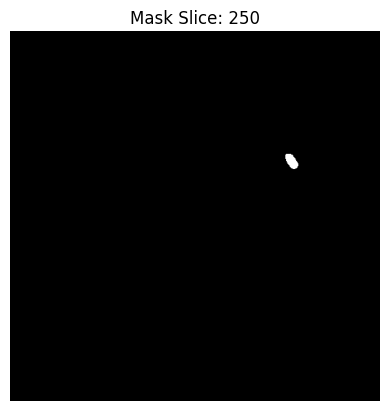

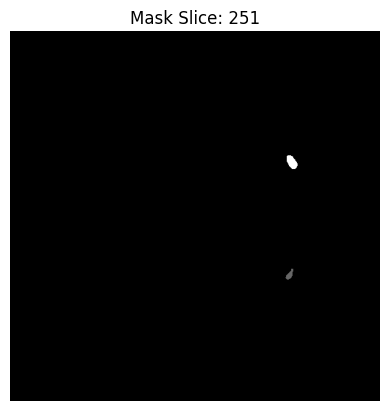

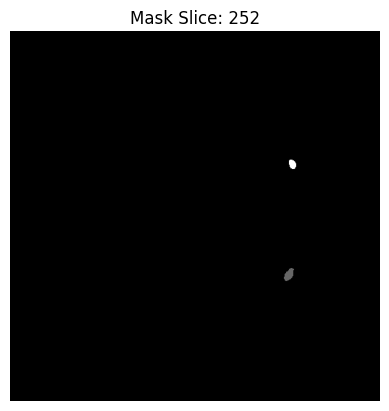

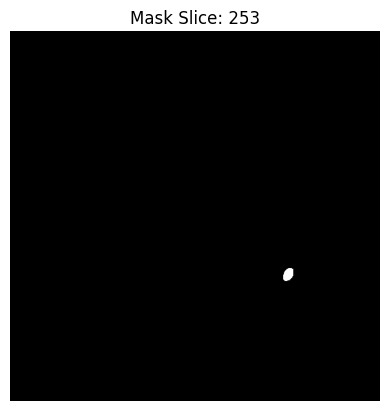

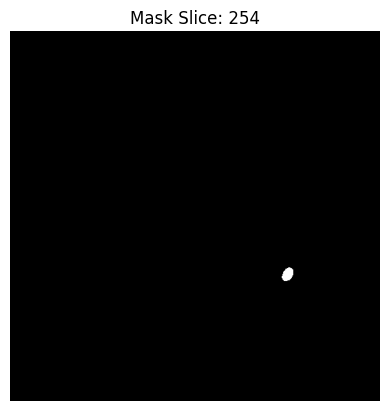

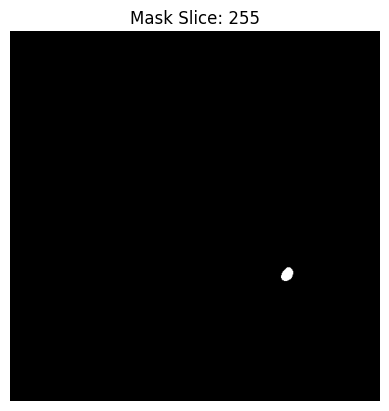

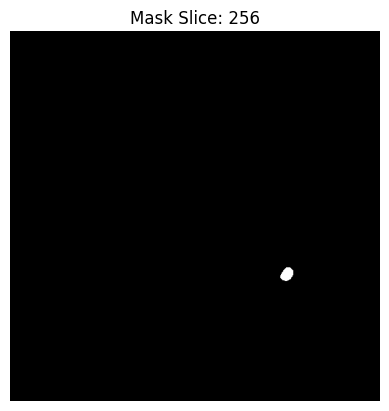

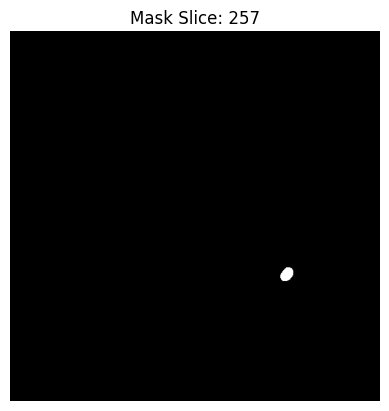

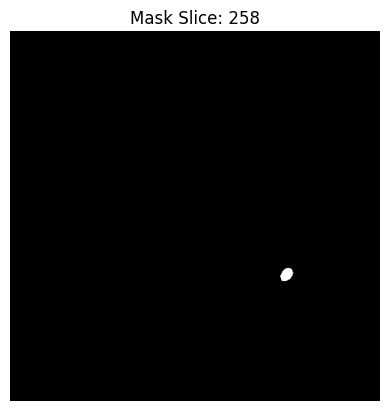

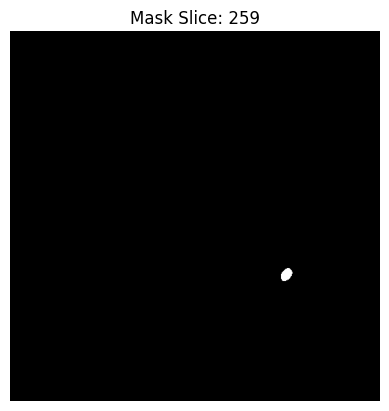

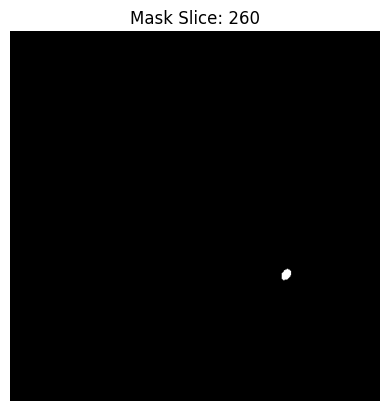

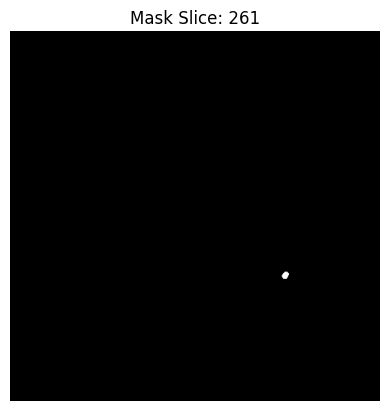

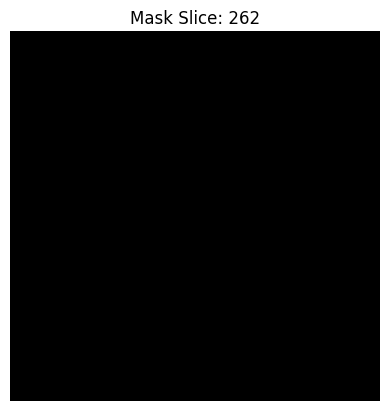

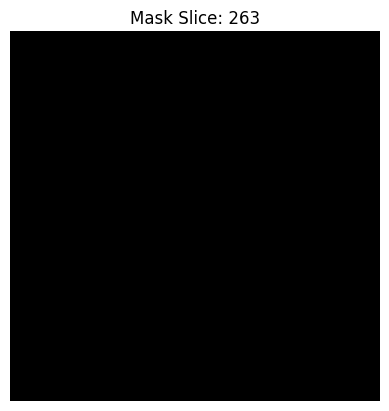

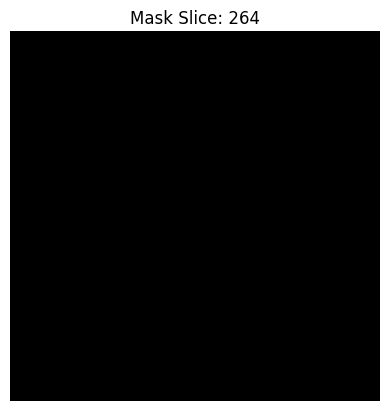

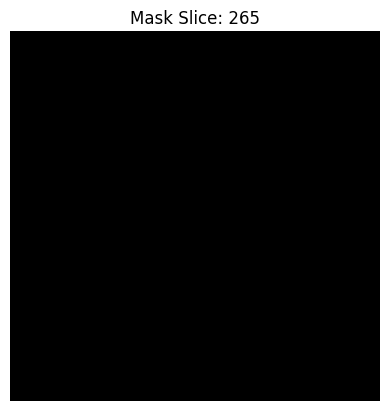

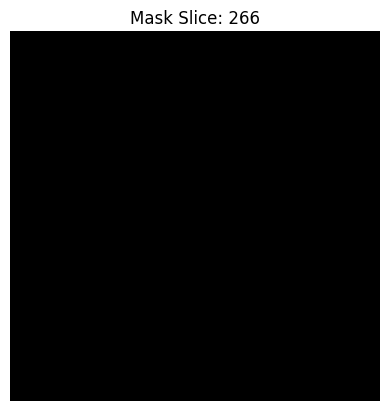

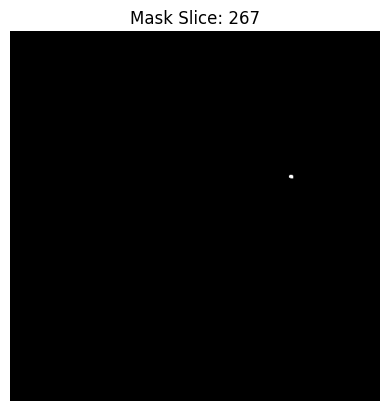

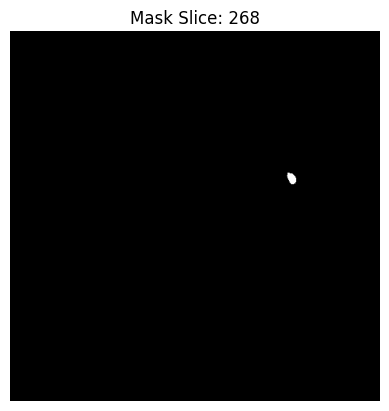

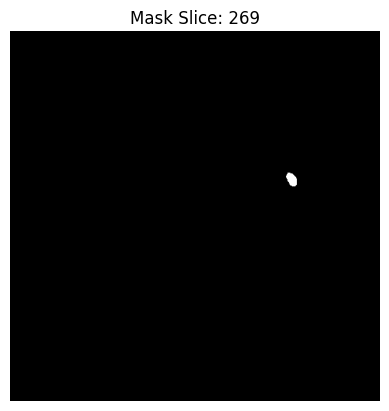

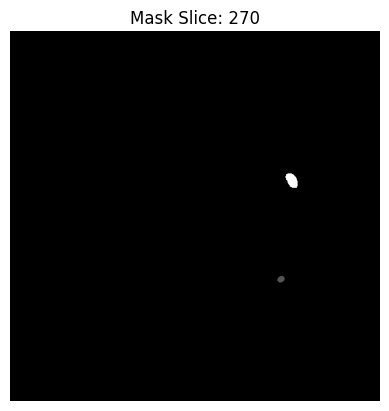

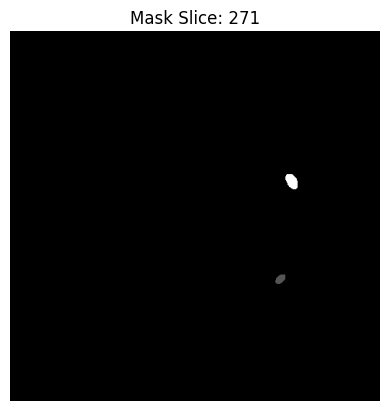

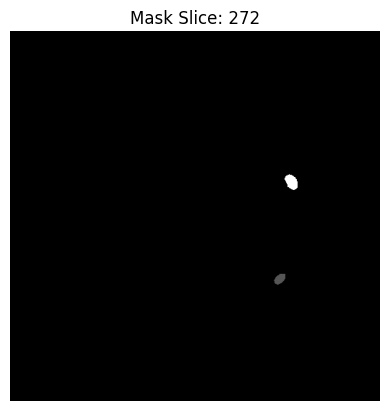

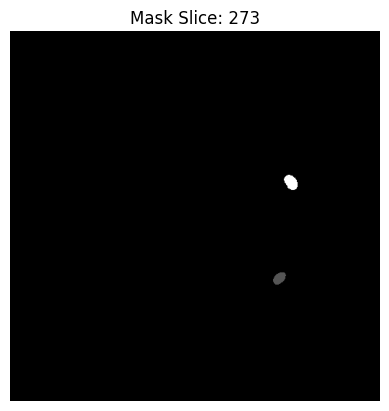

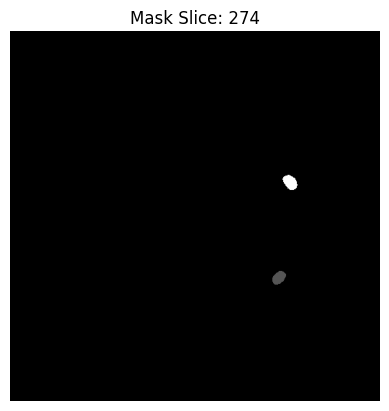

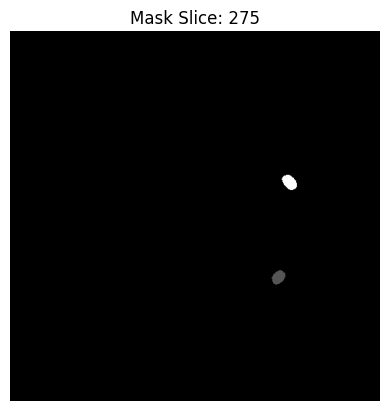

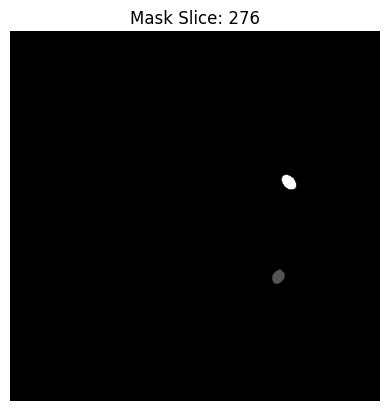

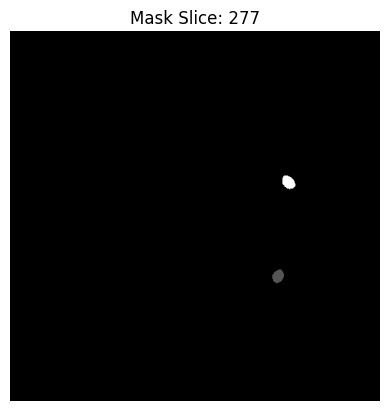

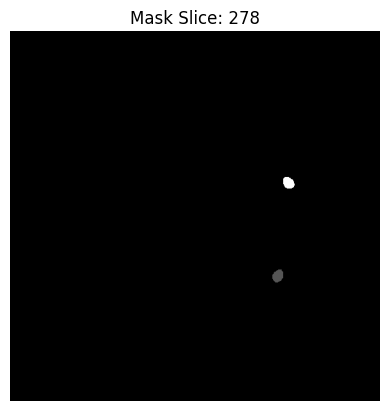

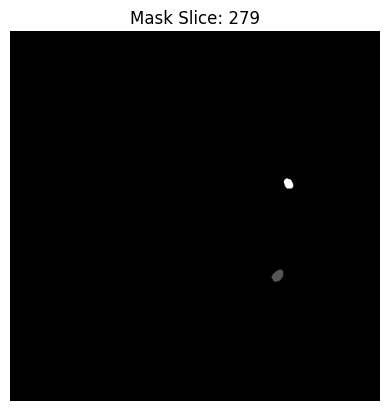

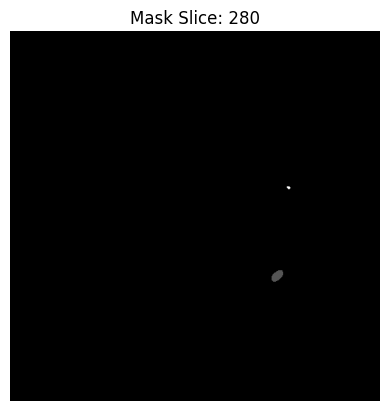

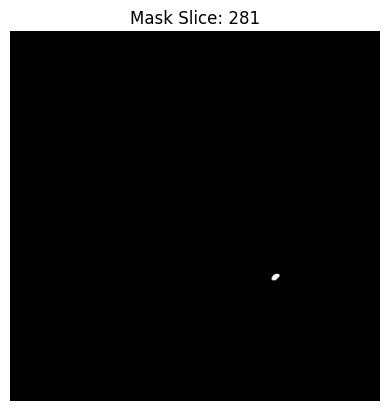

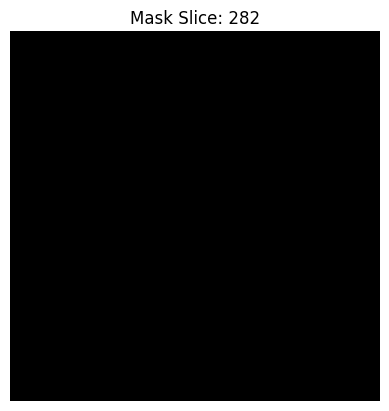

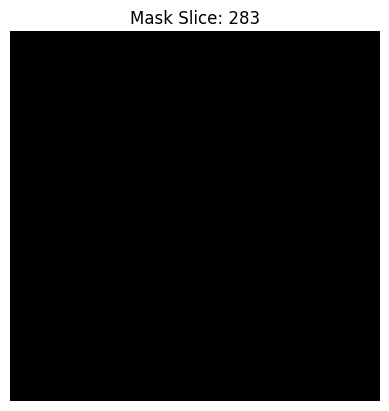

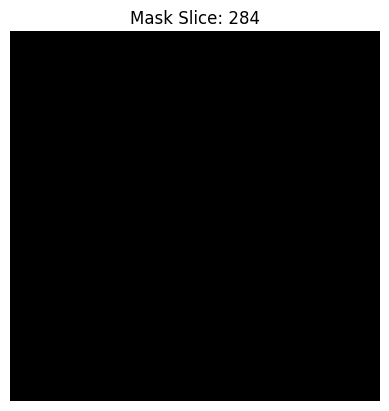

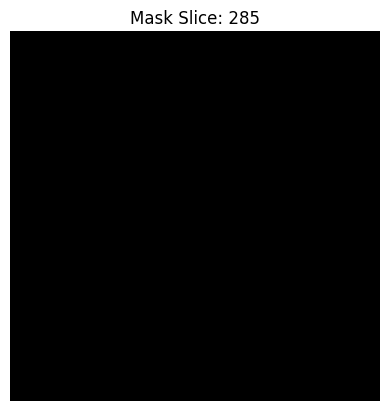

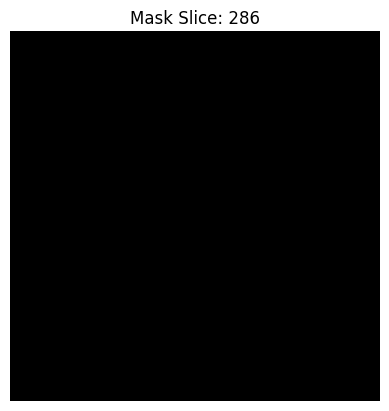

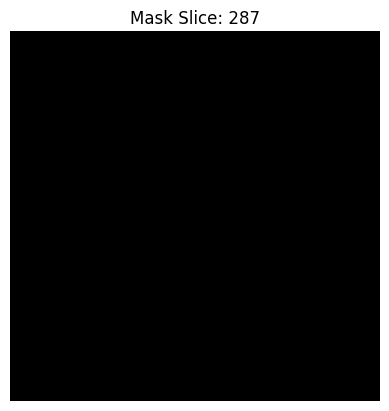

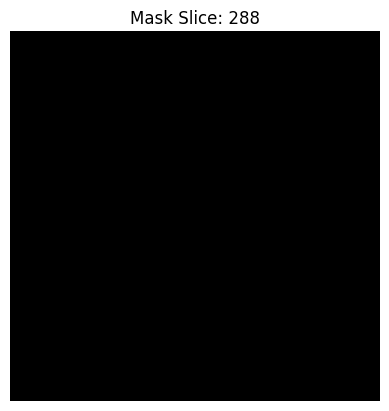

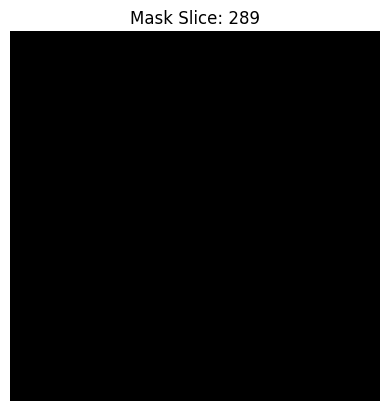

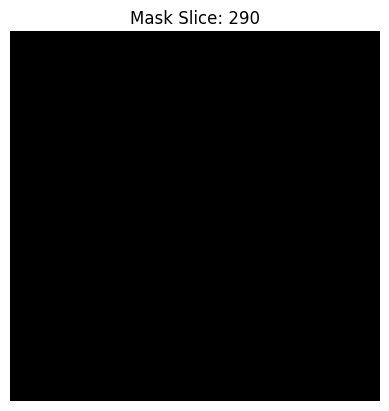

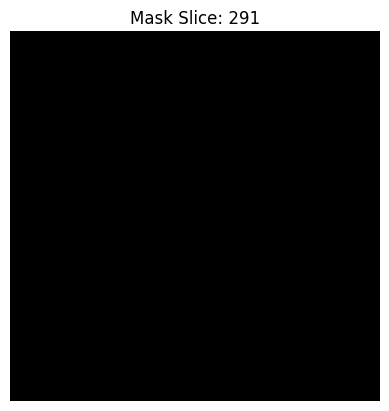

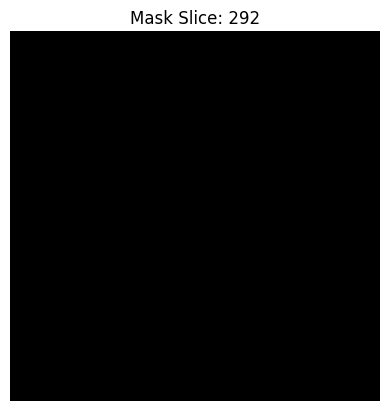

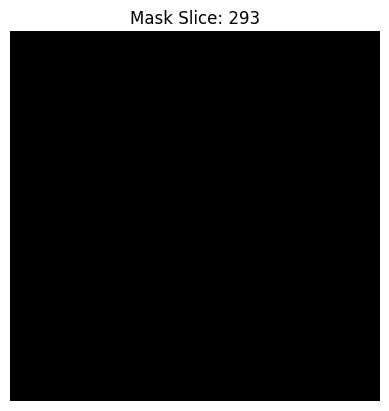

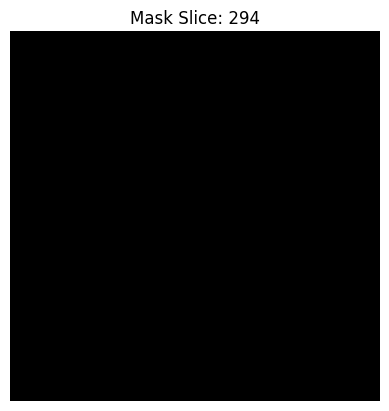

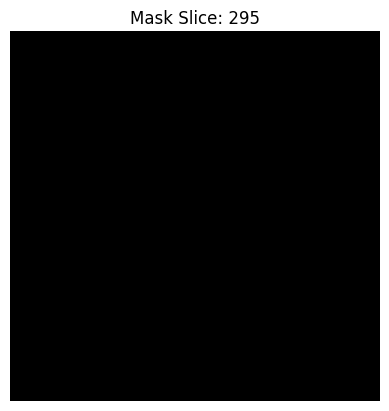

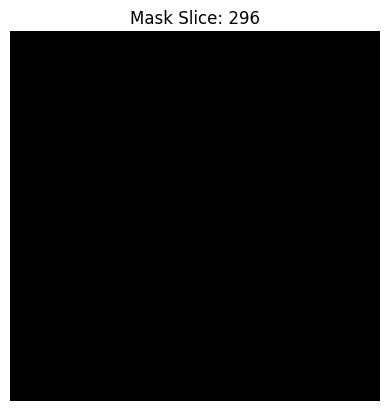

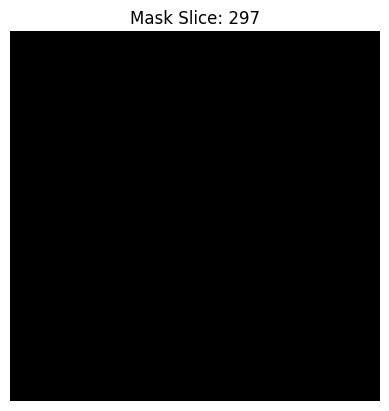

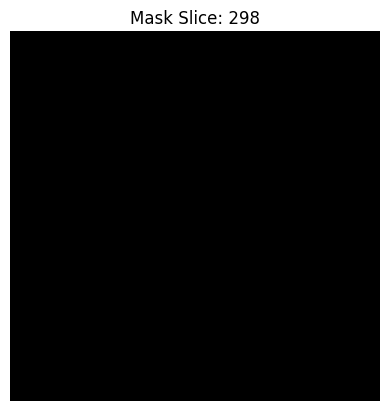

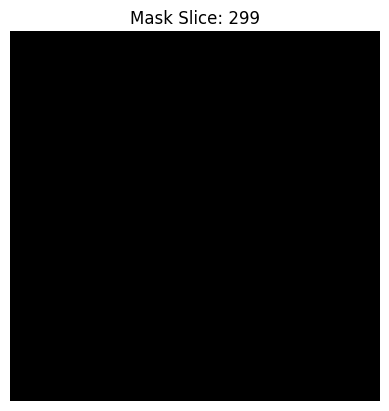

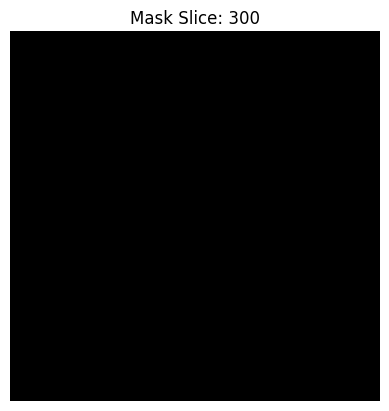

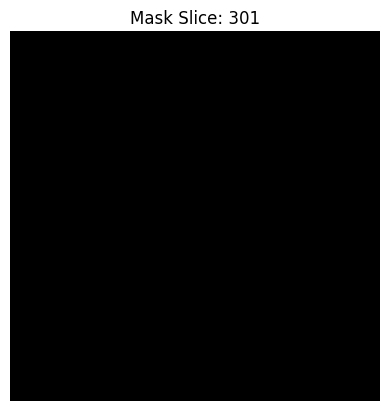

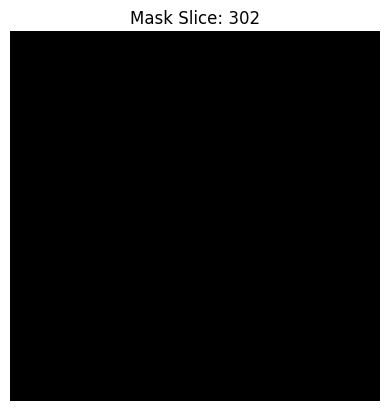

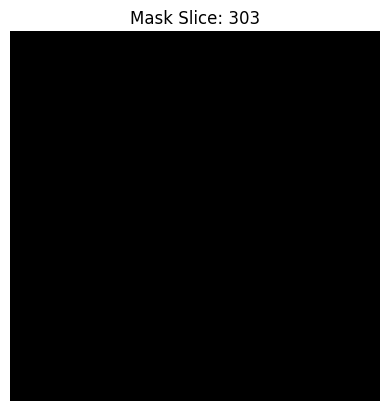

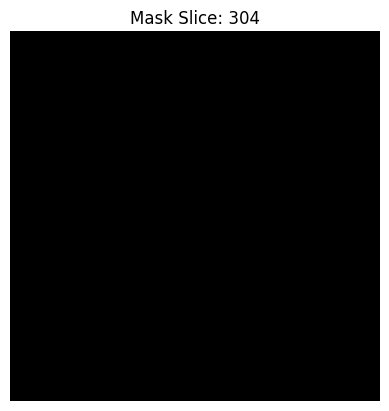

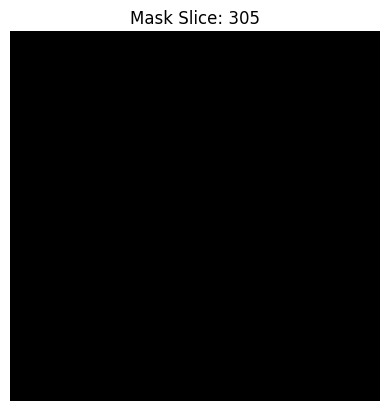

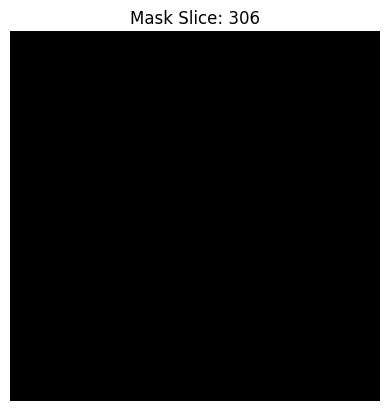

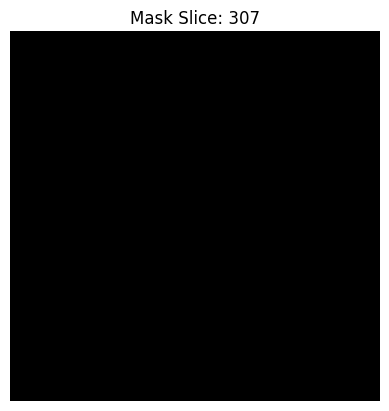

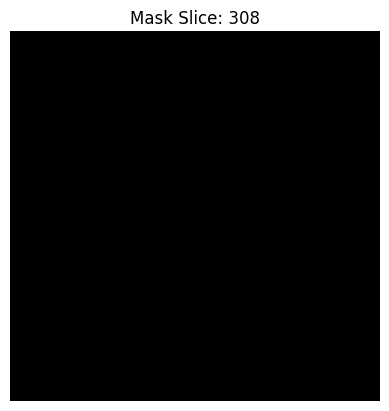

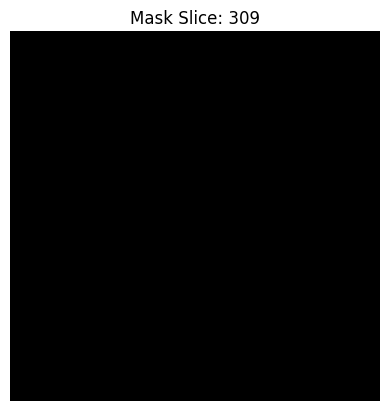

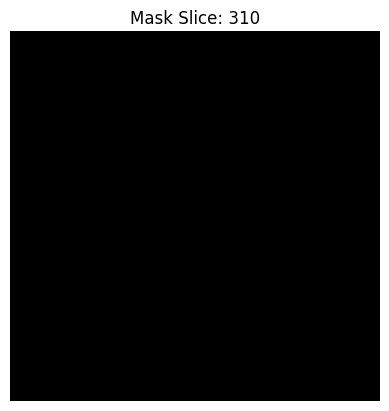

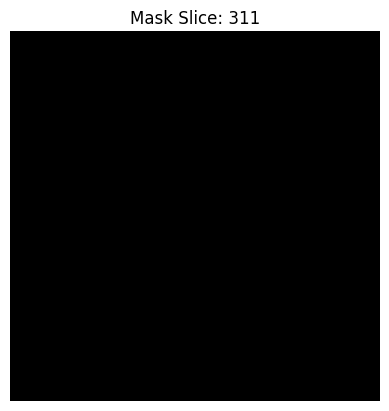

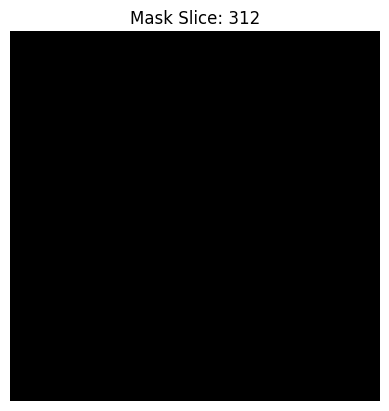

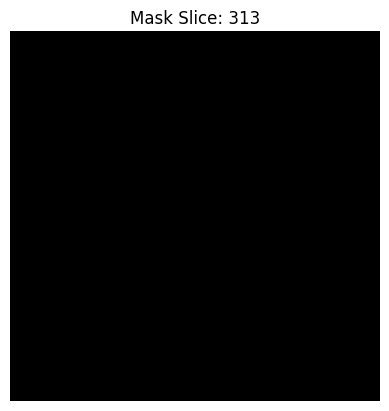

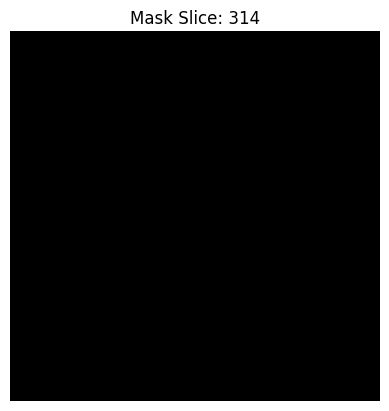

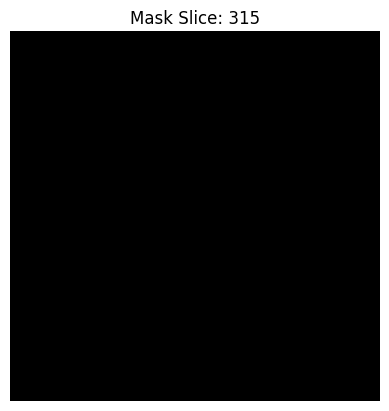

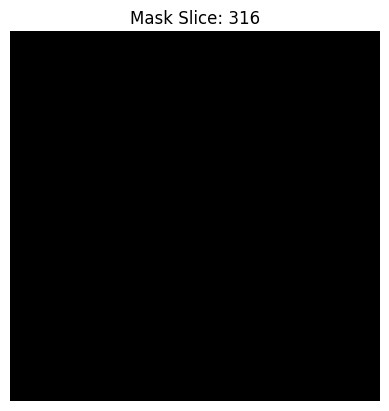

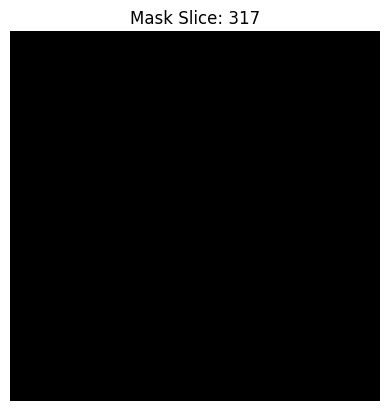

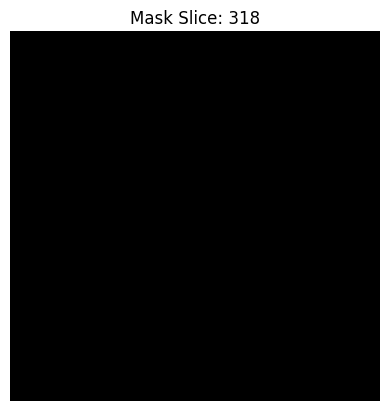

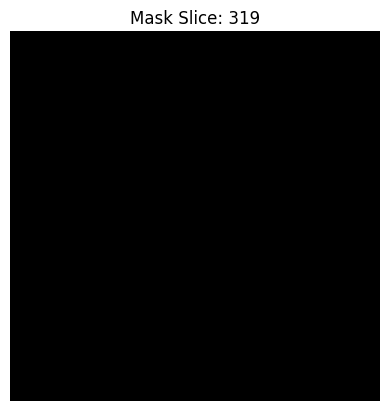

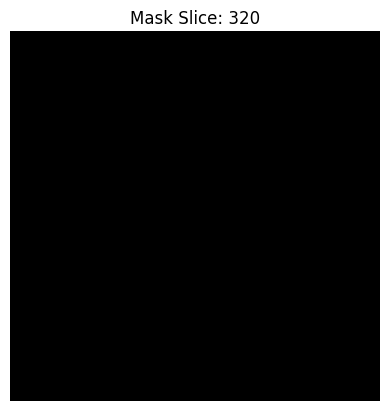

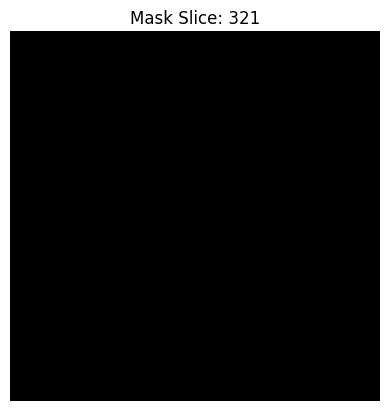

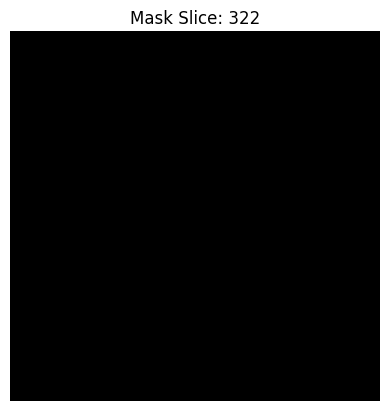

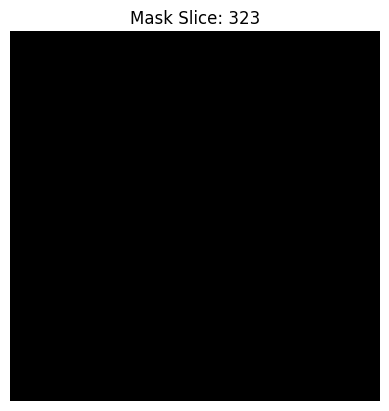

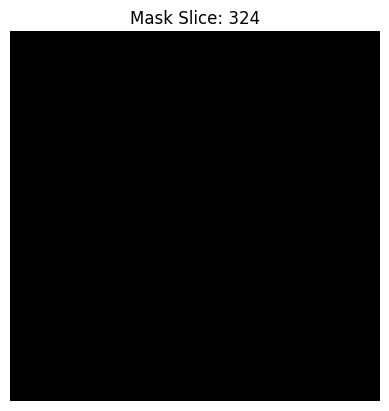

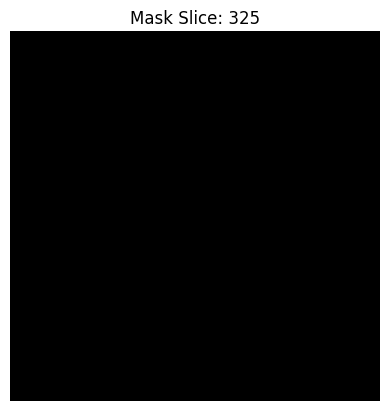

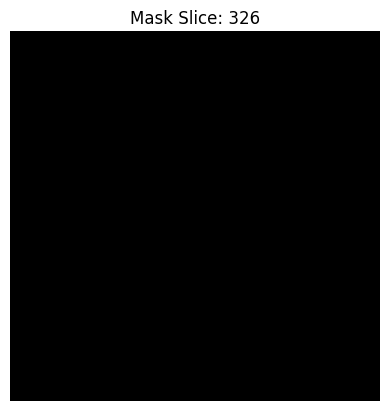

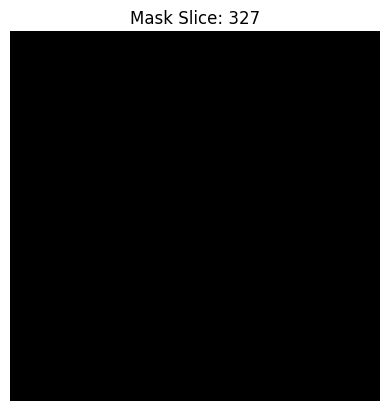

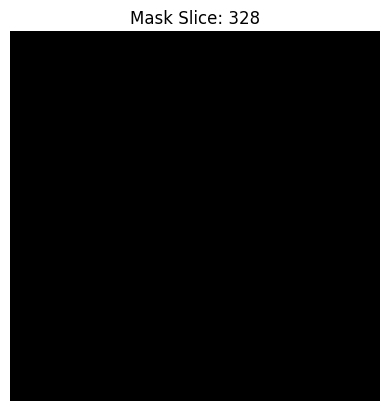

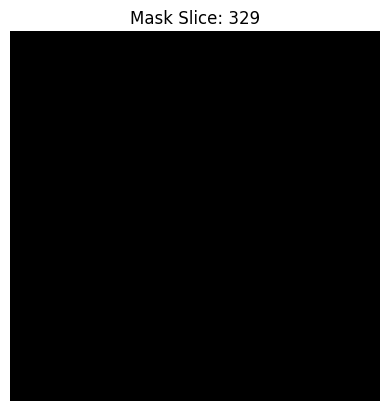

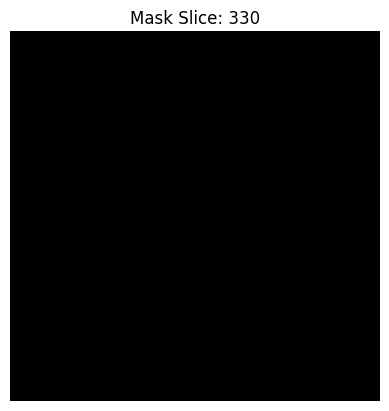

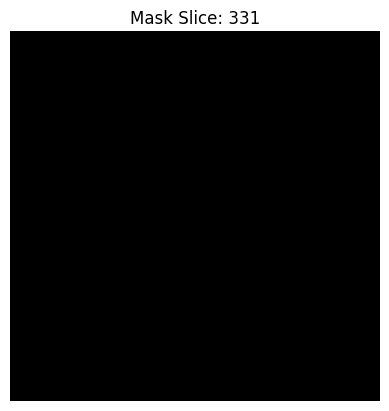

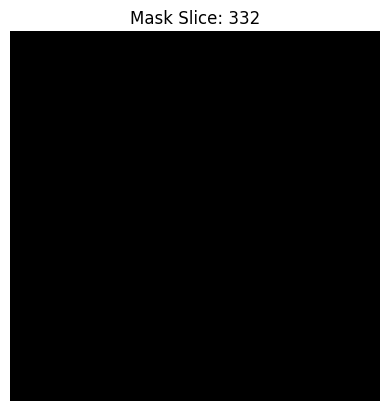

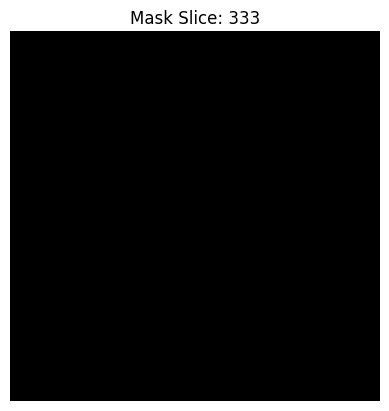

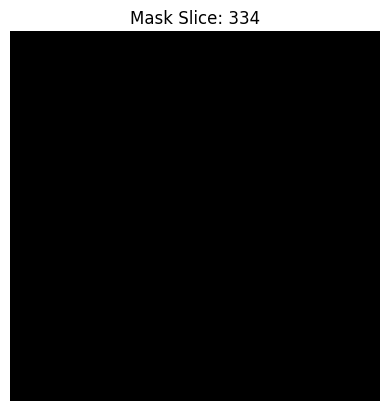

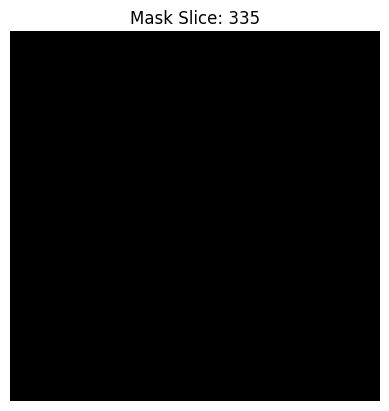

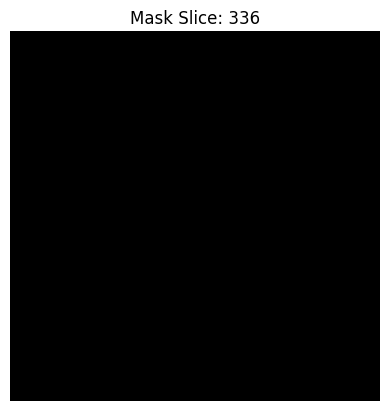

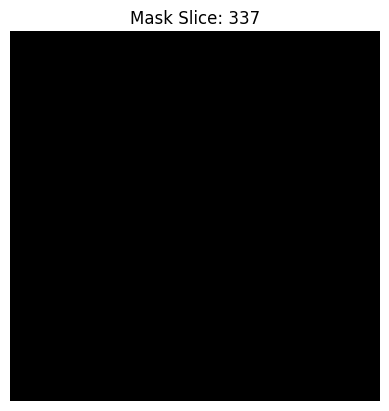

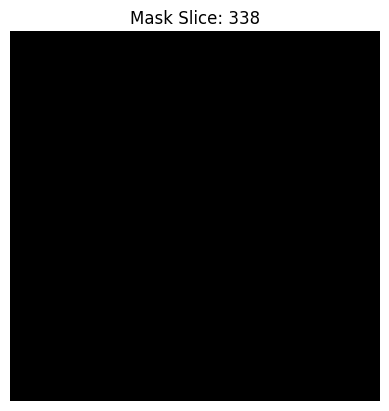

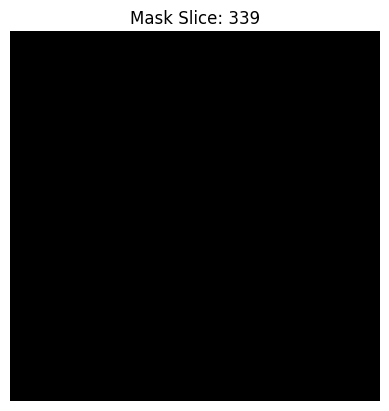

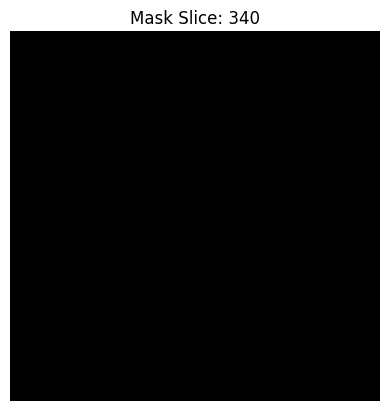

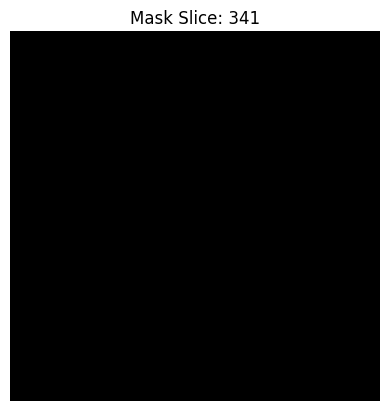

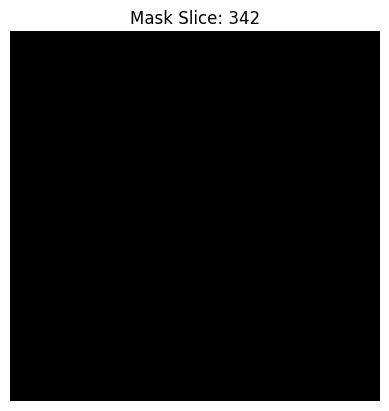

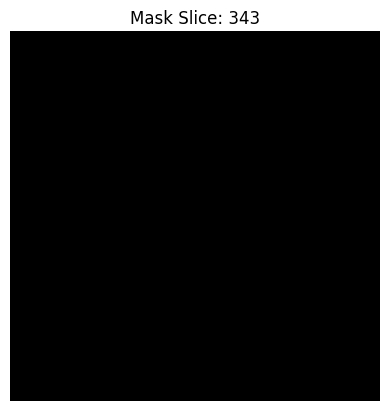

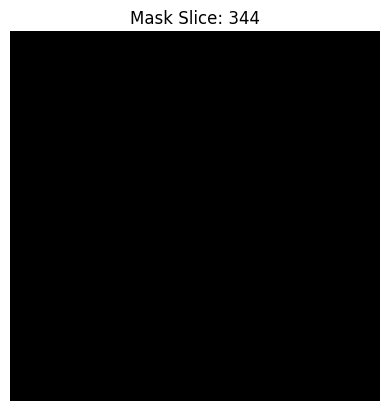

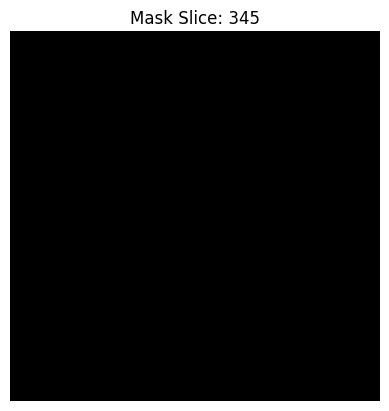

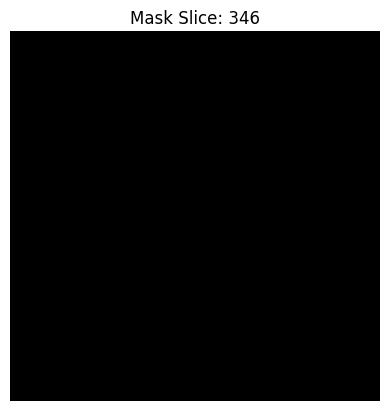

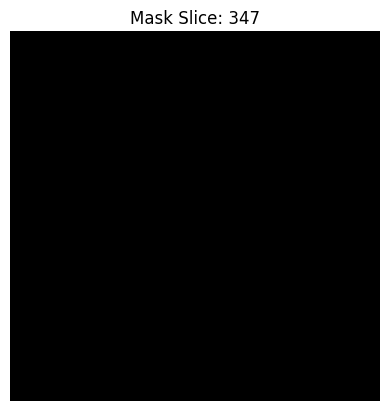

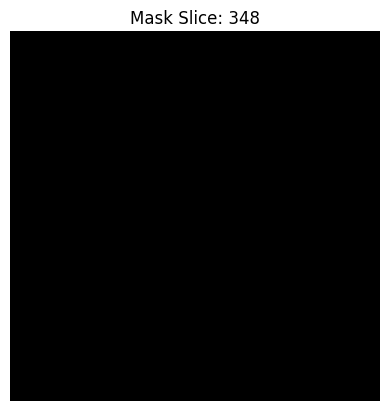

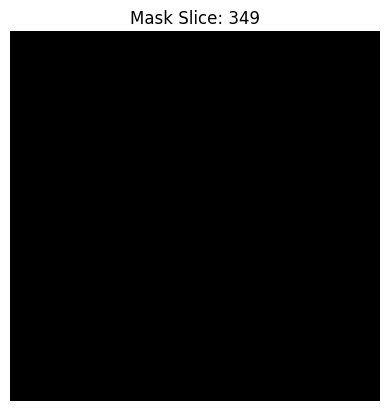

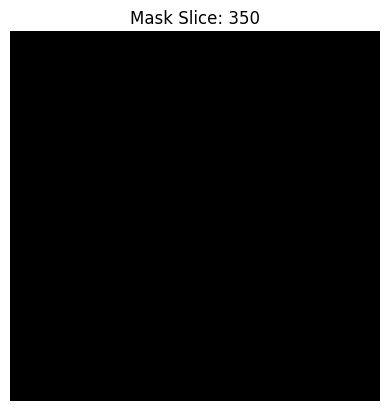

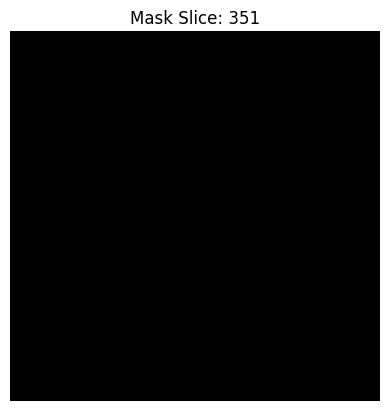

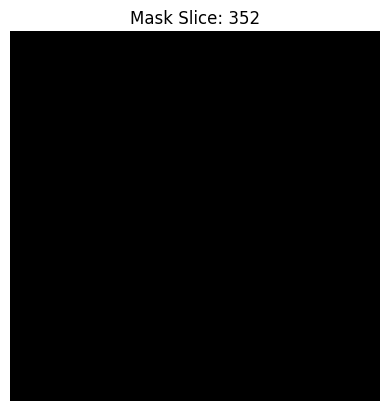

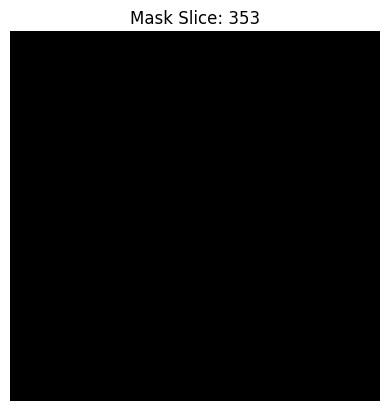

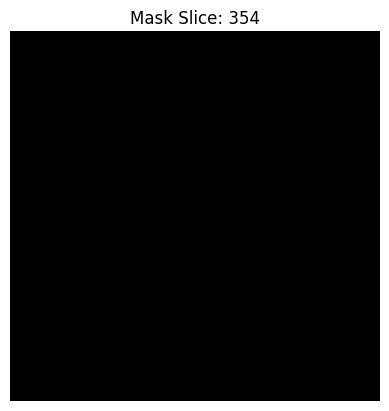

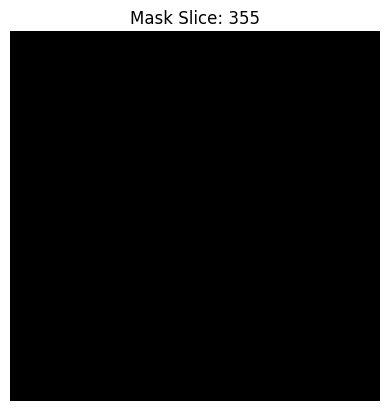

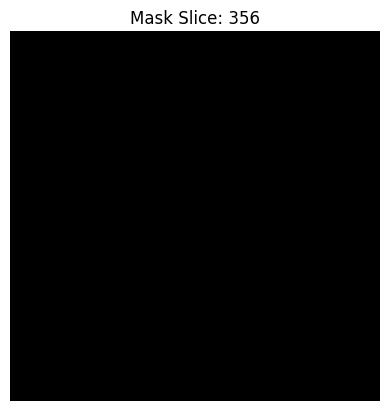

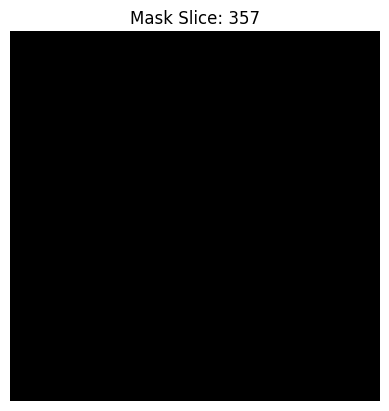

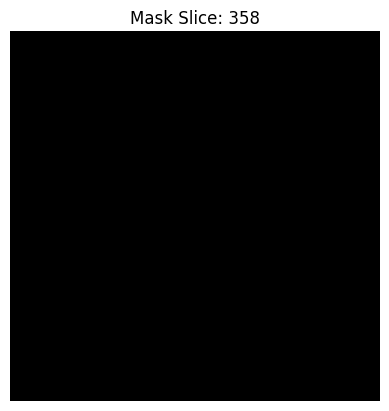

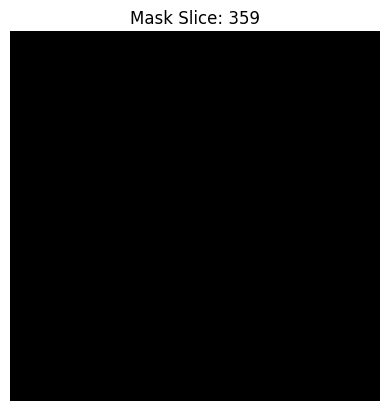

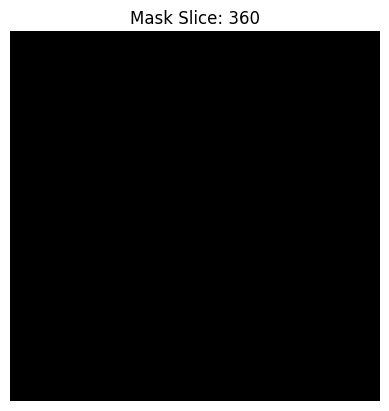

In [ ]:
# plotting each slice of the mask
num_slices = mask.shape[0]  # Get the number of slices in the mask
for slice_idx in range(num_slices):
    plt.figure()
    plt.imshow(mask[slice_idx], cmap='gray')
    plt.title(f'Mask Slice: {slice_idx}')
    plt.axis('off')

plt.show()